# SQL 

1. Welcome to the course!
Hi, and welcome to Introduction to SQL for Data Science! Most of the world's data live in databases, so learning how to access and unlock insights from these data is an essential skill for every data scientist. SQL, or ess-que-el, is the native language for interacting with databases and is designed for exactly this purpose. This course will give you a basic introduction to SQL. We hope you enjoy it.

In [1]:
!pip install psycopg2

In [2]:
import psycopg2

import pandas as pd

# This Python script connects to a PostgreSQL database and utilizes Pandas to obtain data and create a data frame
# A initialization and configuration file is used to protect the author's login credentials

# Establish a connection to the database by creating a cursor object

# Connect to the PostgreSQL database
con = psycopg2.connect(host = "localhost", database="postgres", user='postgres', password='*********', port= '5432')
# Create a new cursor

cur = con.cursor()


# A function that takes in a PostgreSQL query and outputs a pandas database 
def sql(sql_query, database = con):
    table = pd.read_sql_query(sql_query, database)
    return table
  
# Utilize the create_pandas_table function to create a Pandas data frame

# Store the data as a variable

## you can see all the tables in a data base schema with the following code below
cur.execute("""SELECT table_name FROM information_schema.tables""")
for table in cur.fetchall():
    print(table)

# Close the cursor and connection to so the server can allocate
# bandwidth to other requests
#cur.close()
#con.close()

('financial_data',)
('countries',)
('presidents',)
('cities',)
('company_departments',)
('company_regions',)
('pg_statistic',)
('pg_type',)
('employees',)
('prime_ministers',)
('states',)
('monarchs',)
('pg_foreign_table',)
('gapminder',)
('mpg',)
('pg_authid',)
('pg_shadow',)
('inflation_rates',)
('pg_statistic_ext_data',)
('pg_roles',)
('pg_settings',)
('pg_file_settings',)
('pg_hba_file_rules',)
('pg_config',)
('pg_shmem_allocations',)
('pg_backend_memory_contexts',)
('populations',)
('countries_plus',)
('currencies',)
('economies',)
('economies2010',)
('languages',)
('pg_available_extension_versions',)
('pg_user_mapping',)
('pg_stat_xact_user_functions',)
('pg_replication_origin_status',)
('pg_subscription',)
('pg_attribute',)
('pg_proc',)
('pg_class',)
('pg_attrdef',)
('pg_constraint',)
('pg_inherits',)
('pg_index',)
('pg_operator',)
('pg_opfamily',)
('pg_opclass',)
('pg_am',)
('pg_amop',)
('pg_amproc',)
('pg_language',)
('pg_stat_archiver',)
('pg_stat_bgwriter',)
('pg_stat_wal',)

In [3]:
sql("SELECT country_name FROM countries")

,country_name
0,Afghanistan
1,Netherlands
2,Albania
3,Algeria
4,American Samoa
...,...
201,Estonia
202,United States
203,Virgin Islands U.S.
204,Zimbabwe


In [3]:
SELECT 'SQL'
AS result;

SyntaxError: invalid syntax (Temp/ipykernel_3184/2650919452.py, line 1)

## SELECTing single columns

In [4]:
sql('SELECT region FROM countries;')

,region
0,Southern and Central Asia
1,Western Europe
2,Southern Europe
3,Northern Africa
4,Polynesia
...,...
201,Baltic Countries
202,North America
203,Caribbean
204,Eastern Africa


In [4]:
sql('SELECT indep_year FROM countries;')

,indep_year
0,1919
1,1581
2,1912
3,1962
4,999
...,...
201,1991
202,1776
203,999
204,1980


## SELECTing multiple columns

In [32]:
sql('SELECT local_name, gov_form FROM countries;')

,local_name,gov_form
0,Afganistan/Afqanestan,Islamic Emirate
1,Nederland,Constitutional Monarchy
2,Shqiperia,Republic
3,Al-Jazair/Algerie,Republic
4,Amerika Samoa,US Territory
...,...,...
201,Eesti,Republic
202,United States,Federal Republic
203,Virgin Islands of the United States,US Territory
204,Zimbabwe,Republic


In [ ]:
SELECT title, release_year 
FROM films;


SELECT title, release_year, country
FROM films;

In [34]:
sql('SELECT * FROM countries;')

,code,country_name,continent,region,surface_area,indep_year,local_name,gov_form,capital,cap_long,cap_lat
0,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919,Afganistan/Afqanestan,Islamic Emirate,Kabul,69.17610,34.5228
1,NLD,Netherlands,Europe,Western Europe,41526.0,1581,Nederland,Constitutional Monarchy,Amsterdam,4.89095,52.3738
2,ALB,Albania,Europe,Southern Europe,28748.0,1912,Shqiperia,Republic,Tirane,19.81720,41.3317
3,DZA,Algeria,Africa,Northern Africa,2381740.0,1962,Al-Jazair/Algerie,Republic,Algiers,3.05097,36.7397
4,ASM,American Samoa,Oceania,Polynesia,199.0,999,Amerika Samoa,US Territory,Pago Pago,-170.69100,-14.2846
...,...,...,...,...,...,...,...,...,...,...,...
201,EST,Estonia,Europe,Baltic Countries,45227.0,1991,Eesti,Republic,Tallinn,24.75860,59.4392
202,USA,United States,North America,North America,9363520.0,1776,United States,Federal Republic,Washington D.C.,-77.03200,38.8895
203,VIR,Virgin Islands U.S.,North America,Caribbean,347.0,999,Virgin Islands of the United States,US Territory,Charlotte Amalie,-64.89630,18.3358
204,ZWE,Zimbabwe,Africa,Eastern Africa,390757.0,1980,Zimbabwe,Republic,Harare,31.06720,-17.8312


In [39]:

sql('SELECT * FROM countries LIMIT 10')

,code,country_name,continent,region,surface_area,indep_year,local_name,gov_form,capital,cap_long,cap_lat
0,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919,Afganistan/Afqanestan,Islamic Emirate,Kabul,69.17610,34.52280
1,NLD,Netherlands,Europe,Western Europe,41526.0,1581,Nederland,Constitutional Monarchy,Amsterdam,4.89095,52.37380
2,ALB,Albania,Europe,Southern Europe,28748.0,1912,Shqiperia,Republic,Tirane,19.81720,41.33170
3,DZA,Algeria,Africa,Northern Africa,2381740.0,1962,Al-Jazair/Algerie,Republic,Algiers,3.05097,36.73970
4,ASM,American Samoa,Oceania,Polynesia,199.0,999,Amerika Samoa,US Territory,Pago Pago,-170.69100,-14.28460
5,AND,Andorra,Europe,Southern Europe,468.0,1278,Andorra,Parliamentary Coprincipality,Andorra la Vella,1.52180,42.50750
6,AGO,Angola,Africa,Central Africa,1246700.0,1975,Angola,Republic,Luanda,13.24200,-8.81155
7,ATG,Antigua and Barbuda,North America,Caribbean,442.0,1981,Antigua and Barbuda,Constitutional Monarchy,Saint John's,-61.84560,17.11750
8,ARE,United Arab Emirates,Asia,Middle East,83600.0,1971,Al-Imarat al-´Arabiya al-Muttahida,Emirate Federation,Abu Dhabi,54.37050,24.47640
9,ARG,Argentina,South America,South America,2780400.0,1816,Argentina,Federal Republic,Buenos Aires,-58.41730,-34.61180


## SELECT DISTINCT

In [5]:
sql('SELECT DISTINCT region FROM countries;')

,region
0,Southern Africa
1,Caribbean
2,Eastern Africa
3,Southern Europe
4,Eastern Asia
5,South America
6,Baltic Countries
7,North America
8,Australia and New Zealand
9,Southern and Central Asia


In [42]:
sql('SELECT DISTINCT gov_form FROM countries;')

,gov_form
0,Federation
1,Socialistic Republic
2,Nonmetropolitan Territory of France
3,Nonmetropolitan Territory of The Netherlands
4,Emirate Federation
5,Republic
6,Parlementary Monarchy
7,US Territory
8,Commonwealth of the US
9,Constitutional Monarchy (Emirate)


In [6]:
sql('SELECT DISTINCT continent FROM countries;')

,continent
0,Africa
1,Asia
2,South America
3,North America
4,Europe
5,Oceania


## Learning to COUNT

In [7]:
#to get the count of all rows in a table
sql('SELECT COUNT(*) FROM countries;')

,count
0,206


In [8]:

#this counts the number of distinct region contained in the countries table:
sql('SELECT COUNT(DISTINCT region) FROM countries;')

,count
0,23


In [9]:
#Count the number of unique gov_form in the countries table.
sql('SELECT count(DISTINCT gov_form) FROM countries;')

,count
0,25


## Filtering results
Congrats on finishing the first chapter! You now know how to select columns and perform basic counts. This chapter will focus on filtering your results.

In SQL, the WHERE keyword allows you to filter based on both text and numeric values in a table. There are a few different comparison operators you can use:

= equal
<> not equal
< less than,      > greater than
<=  less than or equal to,      >= greater than or equal to


For example, you can filter text records such as title. The following code returns all films with the title 'Metropolis':

SELECT title
FROM films
WHERE title = 'Metropolis';

Notice that the WHERE clause always comes after the FROM statement!

Note that in this course we will use <> and not != for the not equal operator, as per the SQL standard.

What does the following query return?
SELECT title
FROM films
WHERE release_year > 2000;

In [ ]:
#Films released after the year 2000

SELECT title
FROM films
WHERE release_year > 2000;


#The following code returns all films with the title 'Metropolis'
SELECT title
FROM films
WHERE title = 'Metropolis';

In [10]:
sql("SELECT population FROM gapminder WHERE region = 'America' LIMIT 5")

,population
0,40381860.0
1,348587.0
2,277315.0
3,306165.0
4,9599916.0


In [69]:
sql('SELECT DISTINCT region FROM gapminder WHERE child_mortality > 100')

,region
0,Sub-Saharan Africa


## Simple filtering of numeric values
As you learned in the previous exercise, the WHERE clause can also be used to filter numeric records, such as years or ages.

For example, the following query selects all details for films with a budget over ten thousand dollars:

SELECT *
FROM films
WHERE budget > 10000;

In [ ]:
#Get all details for all films released in 2016.
SELECT * FROM films WHERE release_year = 2016

#Get the number of films released before 2000.
SELECT COUNT(title) FROM films WHERE release_year<2000

#Get the title and release year of films released after 2000.
SELECT title, release_year FROM films WHERE release_year > 2000

In [11]:
sql('SELECT * FROM countries WHERE indep_year =1923 ')

,code,country_name,continent,region,surface_area,indep_year,local_name,gov_form,capital,cap_long,cap_lat
0,TUR,Turkey,Asia,Middle East,774815.0,1923,Turkiye,Republic,Ankara,32.3606,39.7153


In [76]:
sql('SELECT country_name FROM countries WHERE indep_year > 1990')

,country_name
0,Armenia
1,Azerbaijan
2,Bosnia and Herzegovina
3,Eritrea
4,Georgia
5,Kazakhstan
6,Kyrgyzstan
7,Croatia
8,Latvia
9,Lithuania


In [84]:
sql('SELECT country_name, continent FROM countries WHERE surface_area > 8000000')

,country_name,continent
0,Brazil,South America
1,Canada,North America
2,China,Asia
3,Russian Federation,Europe
4,United States,North America


## Simple filtering of text
Remember, the WHERE clause can also be used to filter text results, such as names or countries.

For example, this query gets the titles of all films which were filmed in China:

SELECT title
FROM films
WHERE country = 'China';
Now it's your turn to practice using WHERE with text values!

Important: in PostgreSQL (the version of SQL we're using), you must use single quotes with WHERE.

In [ ]:
#Get all details for all French language films.
SELECT * from films WHERE language = 'French'

#Get the name and birth date of the person born on November 11th, 1974. Remember to use ISO date format ('1974-11-11')!
SELECT name, birthdate FROM people WHERE birthdate = '1974-11-11'

#Get the number of Hindi language films.
SELECT COUNT(*) FROM films WHERE language = 'Hindi'

#Get all details for all films with an R certification.
SELECT * FROM films WHERE certification = 'R'

In [88]:
sql("SELECT * FROM countries WHERE local_name = 'Shqiperia'")

,code,country_name,continent,region,surface_area,indep_year,local_name,gov_form,capital,cap_long,cap_lat
0,ALB,Albania,Europe,Southern Europe,28748.0,1912,Shqiperia,Republic,Tirane,19.8172,41.3317


In [100]:
sql("SELECT country_name, region FROM countries WHERE indep_year = 1776")

,country_name,region
0,United States,North America


## WHERE ----- AND
Often, you'll want to select data based on multiple conditions. You can build up your WHERE queries by combining multiple conditions with the AND keyword.

For example,

SELECT title
FROM films
WHERE release_year > 1994
AND release_year < 2000;

gives you the titles of films released between 1994 and 2000.


Note that you need to specify the column name separately for every AND condition, so the following would be invalid:

SELECT title
FROM films
WHERE release_year > 1994 AND < 2000;

You can add as many AND conditions as you need!

In [ ]:
#Get the title and release year for all Spanish language films released before 2000.
SELECT title, release_year FROM films WHERE release_year < 2000 AND language = 'Spanish'


#Get all details for Spanish language films released after 2000.
SELECT * FROM films WHERE release_year > 2000 AND language = 'Spanish'


#Get all details for Spanish language films released after 2000, but before 2010.
SELECT * FROM films WHERE language = 'Spanish' AND release_year <2010 AND release_year >2000

In [93]:
sql("SELECT country_name, capital FROM countries WHERE indep_year > 1990 and gov_form = 'Federal Republic'")

,country_name,capital
0,Azerbaijan,Baku
1,Bosnia and Herzegovina,Sarajevo
2,Russian Federation,Moscow


In [99]:
sql("SELECT * FROM countries WHERE indep_year >= 1945 AND indep_year <= 1950 AND gov_form = 'Republic'")

,code,country_name,continent,region,surface_area,indep_year,local_name,gov_form,capital,cap_long,cap_lat
0,PHL,Philippines,Asia,Southeast Asia,300000.0,1946,Pilipinas,Republic,Manila,121.0350,14.55150
1,IDN,Indonesia,Asia,Southeast Asia,1904570.0,1945,Indonesia,Republic,Jakarta,106.8300,-6.19752
2,ISR,Israel,Asia,Middle East,21056.0,1948,Yisrael/Israil,Republic,None,35.2035,31.77170
3,KOR,South Korea,Asia,Eastern Asia,99434.0,1948,Taehan Minguk (Namhan),Republic,Seoul,126.9570,37.53230
4,MMR,Myanmar,Asia,Southeast Asia,676578.0,1948,Myanma Pye,Republic,Naypyidaw,95.9562,21.91400
5,PAK,Pakistan,Asia,Southern and Central Asia,796095.0,1947,Pakistan,Republic,Islamabad,72.8000,30.51670
6,LKA,Sri Lanka,Asia,Southern and Central Asia,65610.0,1948,Sri Lanka/Ilankai,Republic,Colombo,79.8528,6.92148


## WHERE AND OR
What if you want to select rows based on multiple conditions where some but not all of the conditions need to be met? For this, SQL has the OR operator.

For example, the following returns all films released in either 1994 or 2000:

SELECT title
FROM films
WHERE release_year = 1994
OR release_year = 2000;

Note that you need to specify the column for every OR condition, so the following is invalid:

SELECT title
FROM films
WHERE release_year = 1994 OR 2000;

When combining AND and OR, be sure to enclose the individual clauses in parentheses, like so:

SELECT title
FROM films
WHERE (release_year = 1994 OR release_year = 1995)
AND (certification = 'PG' OR certification = 'R');


Otherwise, due to SQL's precedence rules, you may not get the results you're expecting!



In [ ]:
#all films that were released in 1994 or 1995 which had a rating of PG or R.
SELECT * FROM films WHERE (release_year = 1994 OR release_year= 1995) AND (certification= 'PG' OR certification = 'R')



#get the title and release year of films released in the 90s which were in French or Spanish and which took in more than $2M gross.
SELECT title, release_year FROM films WHERE (release_year >= 1990 AND release_year <2000) AND (language = 'Spanish' or language = 'French') AND gross >2000000


In [117]:
sql("SELECT * FROM COUNTRIES WHERE (indep_year = 1945 OR indep_year = 1990)  AND (gov_form = 'Republic' OR gov_form = 'Federal Republic') AND surface_area > 500000")

,code,country_name,continent,region,surface_area,indep_year,local_name,gov_form,capital,cap_long,cap_lat
0,IDN,Indonesia,Asia,Southeast Asia,1904570.0,1945,Indonesia,Republic,Jakarta,106.8300,-6.19752
1,NAM,Namibia,Africa,Southern Africa,824292.0,1990,Namibia,Republic,Windhoek,17.0931,-22.56480


## WHERE ------ BETWEEN
As you've learned, you can use the following query to get titles of all films released in and between 1994 and 2000:

SELECT title
FROM films
WHERE release_year >= 1994
AND release_year <= 2000;


Checking for ranges like this is very common, so in SQL the BETWEEN keyword provides a useful shorthand for filtering values within a specified range. This query is equivalent to the one above:

SELECT title
FROM films
WHERE release_year
BETWEEN 1994 AND 2000;


It's important to remember that BETWEEN is inclusive, meaning the beginning and end values are included in the results!

In [ ]:
#get the names of all kids in the kids table between the ages of 2 and 12 from the United States:
SELECT name FROM kids WHERE age BETWEEN 2 AND 12 AND NATIONALITY = 'USA';


#Get the title and release year of all films released between 1990 and 2000 (inclusive) and have budgets over $100 million which are French or Spanish
SELECT title, release_year
FROM films
WHERE release_year BETWEEN 1990 AND 2000
AND budget > 100000000
AND (language = 'Spanish' OR language ='French')

## WHERE ------ IN
As you've seen, WHERE is very useful for filtering results. However, if you want to filter based on many conditions, WHERE can get unwieldy. For example:

SELECT name
FROM kids
WHERE age = 2
OR age = 4
OR age = 6
OR age = 8
OR age = 10;
Enter the IN operator! The IN operator allows you to specify multiple values in a WHERE clause, making it easier and quicker to specify multiple OR conditions! Neat, right?

So, the above example would become simply:

SELECT name
FROM kids
WHERE age IN (2, 4, 6, 8, 10);

In [ ]:
#Get the title and release year of all films released in 1990 or 2000 that were longer than two hours. Remember, duration is in minutes!
SELECT title, release_year FROM films 
WHERE release_year IN (1990, 2000) AND duration >120;

#Get the title and language of all films which were in English, Spanish, or French.
SELECT title, language FROM films WHERE language IN('English', 'Spanish', 'French')

#Get the title and certification of all films with an NC-17 or R certification
SELECT title, certification FROM films 
WHERE certification IN('NC-17', 'R')

In [7]:
sql("SELECT code, country_name,region FROM countries WHERE indep_year IN (1900, 1945, 1990, 2000) AND gov_form = 'Republic'")

,code,country_name,region
0,IDN,Indonesia,Southeast Asia
1,MHL,Marshall Islands,Micronesia
2,NAM,Namibia,Southern Africa


In [25]:
sql("SELECT code, year, inflation_rate, gdp_percapita FROM economies WHERE income_group IN ('Low income', 'Lower middle income') AND (inflation_rate > 30)")

,code,year,inflation_rate,gdp_percapita
0,SSD,2015,52.813,1049.77
1,UKR,2015,48.684,2135.18
2,YEM,2015,39.403,1334.12
3,SSD,2015,52.813,1049.77
4,UKR,2015,48.684,2135.18
5,YEM,2015,39.403,1334.12


## Introduction to WHERE ------- IS NULL and IS NOT NULL
In SQL, NULL represents a missing or unknown value. You can check for NULL values using the expression IS NULL. For example, to count the number of missing birth dates in the people table:

SELECT COUNT(*)
FROM people
WHERE birthdate IS NULL;
As you can see, IS NULL is useful when combined with WHERE to figure out what data you're missing.

Sometimes, you'll want to filter out missing values so you only get results which are not NULL. To do this, you can use the IS NOT NULL operator.

For example, this query gives the names of all people whose birth dates are not missing in the people table.

SELECT name
FROM people
WHERE birthdate IS NOT NULL;

In [ ]:
#Get the names of people who are still alive, i.e. whose death date is missing
SELECT name from people WHERE deathdate IS NULL

#Get the title of every film which doesn't have a budget associated with it.
SELECT title FROM films WHERE budget IS NULL


#Get the number of films which don't have a language associated with them.
SELECT COUNT(*) FROM films WHERE language IS NULL

In [30]:
sql('SELECT COUNT(*) FROM economies WHERE unemployment_rate IS NULL AND year = 2010')

,count
0,160


In [31]:
sql('SELECT COUNT(*) FROM economies WHERE unemployment_rate IS NOT NULL AND year = 2010')

,count
0,220


## WHERE -------- LIKE and NOT LIKE
As you've seen, the WHERE clause can be used to filter text data. However, so far you've only been able to filter by specifying the exact text you're interested in. In the real world, often you'll want to search for a pattern rather than a specific text string.

In SQL, the LIKE operator can be used in a WHERE clause to search for a pattern in a column. To accomplish this, you use something called a wildcard as a placeholder for some other values. There are two wildcards you can use with LIKE:

The % wildcard will match zero, one, or many characters in text. For example, the following query matches companies like 'Data', 'DataC' 'DataCamp', 'DataMind', and so on:

SELECT name
FROM companies
WHERE name LIKE 'Data%';

The _ wildcard will match a single character. For example, the following query matches companies like 'DataCamp', 'DataComp', and so on:

SELECT name
FROM companies
WHERE name LIKE 'DataC_mp';
You can also use the NOT LIKE operator to find records that don't match the pattern you specify.

In [ ]:
#Get the names of all people whose names begin with 'B'. The pattern you need is 'B%'.
SELECT name FROM people WHERE name LIKE 'B%' 


#Get the names of people whose names have 'r' as the second letter. The pattern you need is '_r%'.
SELECT name FROM people WHERE name LIKE '_r%'


#Get the names of people whose names don't start with A. The pattern you need is 'A%'.
SELECT name FROM people WHERE name NOT LIKE 'A%'.

In [46]:
sql("SELECT last_name, email, start_date FROM employees WHERE last_name LIKE 'a%' AND job_title = 'senior editor'")

,last_name,email,start_date
0,armstrong,parmstrong1d@hc360.com,2017-09-13
1,armstrong,parmstrong1d@hc360.com,2016-02-19


In [53]:
sql("SELECT last_name, email, start_date FROM employees WHERE last_name LIKE '_r%' AND job_title = 'senior editor'")

,last_name,email,start_date
0,armstrong,parmstrong1d@hc360.com,2017-09-13
1,ortiz,aortiz2j@jigsy.com,2020-07-17
2,armstrong,parmstrong1d@hc360.com,2016-02-19
3,ortiz,aortiz2j@jigsy.com,2021-07-16


In [62]:
sql("SELECT last_name, start_date from employees WHERE last_name LIKE '%k' AND start_date < '2016-05-19' ")

,last_name,start_date
0,clark,2015-10-19
1,cook,2016-02-14


## Aggregate functions
Often, you will want to perform some calculation on the data in a database. SQL provides a few functions, called aggregate functions, to help you out with this.

For example,

SELECT AVG(budget)
FROM films;
gives you the average value from the budget column of the films table. Similarly, the MAX function returns the highest budget:

SELECT MAX(budget)
FROM films;
The SUM function returns the result of adding up the numeric values in a column:

SELECT SUM(budget)
FROM films;
You can probably guess what the MIN function does! Now it's your turn to try out some SQL functions.

In [ ]:
#Use the SUM function to get the total duration of all films.
SELECT SUM(duration) FROM films

#Get the average duration of all films.
SELECT AVG(duration) FROM films

#Get the duration of the shortest film.
SELECT MIN(duration) FROM films 

#Get the duration of the longest film.
SELECT MAX(duration) FROM films

#Use the SUM function to get the total amount grossed by all films.
SELECT SUM(gross) FROM films

#Get the average amount grossed by all films.
SELECT AVG(gross) FROM films

#Get the amount grossed by the worst performing film.
SELECT MIN(gross) FROM films 

#Get the amount grossed by the best performing film.
SELECT MAX(gross) FROM films 

In [70]:
sql("SELECT SUM(gross_sales) FROM financial_data")

,sum
0,"$127,931,598.50"


In [71]:
sql("SELECT AVG(units_sold) FROM financial_data")

,avg
0,1608.32


In [72]:
sql("SELECT MIN(units_sold) FROM financial_data")

,min
0,200.0


In [73]:
sql("SELECT MAX(units_sold) FROM financial_data")

,max
0,4493.0


## Combining aggregate functions with WHERE
Aggregate functions can be combined with the WHERE clause to gain further insights from your data.

For example, to get the total budget of movies made in the year 2010 or later:

SELECT SUM(budget)
FROM films
WHERE release_year >= 2010;
Now it's your turn!

In [ ]:
#Use the SUM function to get the total amount grossed by all films made in the year 2000 or later.
SELECT SUM(gross) FROM films WHERE release_year >=2000

#Get the average amount grossed by all films whose titles start with the letter 'A'.
SELECT AVG(gross) FROM films WHERE title LIKE 'A%'

#Get the amount grossed by the worst performing film in 1994.
SELECT MIN(gross) FROM films WHERE release_year=1994


#Get the amount grossed by the best performing film between 2000 and 2012, inclusive.
SELECT MAX(gross) FROM films WHERE release_year BETWEEN 2000 AND 2012

In [74]:
sql('SELECT SUM(profit) FROM financial_data WHERE year = 2013')

,sum
0,"$3,878,464.51"


In [75]:
sql("SELECT AVG(units_sold) FROM financial_data WHERE product LIKE 'C%' ")

,avg
0,1579.021505


In [97]:
sql("SELECT SUM(profit) FROM financial_data WHERE sale_price BETWEEN '0' AND '51'")

,sum
0,"$3,535,771.16"


In [98]:
sql("SELECT SUM(profit) FROM financial_data WHERE sale_price BETWEEN '200' AND '300'")

,sum
0,"$4,143,168.50"


## A note on arithmetic
In addition to using aggregate functions, you can perform basic arithmetic with symbols like +, -, *, and /.

So, for example, this gives a result of 12:

SELECT (4 * 3);
However, the following gives a result of 1:

SELECT (4 / 3);
What's going on here?

SQL assumes that if you divide an integer by an integer, you want to get an integer back. So be careful when dividing!

If you want more precision when dividing, you can add decimal places to your numbers. For example,

SELECT (4.0 / 3.0) AS result;
gives you the result you would expect: 1.333.

## It's AS simple AS aliasing
You may have noticed in the first exercise of this chapter that the column name of your result was just the name of the function you used. For example,

SELECT MAX(budget)
FROM films;
gives you a result with one column, named max. But what if you use two functions like this?

SELECT MAX(budget), MAX(duration)
FROM films;
Well, then you'd have two columns named max, which isn't very useful!

To avoid situations like this, SQL allows you to do something called aliasing. Aliasing simply means you assign a temporary name to something. To alias, you use the AS keyword, which you've already seen earlier in this course.

For example, in the above example we could use aliases to make the result clearer:

SELECT MAX(budget) AS max_budget,
       MAX(duration) AS max_duration
FROM films;
Aliases are helpful for making results more readable!

In [ ]:
#Get the title and net profit (the amount a film grossed, minus its budget) for all films. Alias the net profit as net_profit.
SELECT title, gross-budget AS net_profit FROM films

#Get the title and duration in hours for all films. The duration is in minutes, so you'll need to divide by 60.0 to get the duration in hours. Alias the duration in hours as duration_hours.
SELECT title, duration/60.0 AS duration_hours FROM films 

#Get the average duration in hours for all films, aliased as avg_duration_hours.
SELECT AVG(duration)/60.0 AS avg_duration_hours FROM films

In [108]:
sql("SELECT SUM(manufacturing_price) AS SUM_cost FROM financial_data WHERE product = 'Paseo' AND YEAR = '2013'")

,sum_cost
0,$510.00


In [117]:
sql("SELECT SUM(sale_price - manufacturing_price) AS item_profit FROM financial_data WHERE product = 'Montana'")

,item_profit
0,"$10,425.00"


In [126]:
sql("SELECT year, month_number, profit/units_sold AS profit_per_item FROM financial_data WHERE product = 'Velo'")

,year,month_number,profit_per_item
0,2014,1,$2.00
1,2014,2,$5.00
2,2014,3,$9.00
3,2014,6,$90.00
4,2014,6,$9.00
...,...,...,...
104,2014,5,$2.75
105,2014,9,($13.75)
106,2013,11,$5.00
107,2013,12,($13.75)


## Even more aliasing
Let's practice your newfound aliasing skills some more before moving on!

Recall: SQL assumes that if you divide an integer by an integer, you want to get an integer back.

This means that the following will erroneously result in 400.0:

SELECT 45 / 10 * 100.0;
This is because 45 / 10 evaluates to an integer (4), and not a decimal number like we would expect.

So when you're dividing make sure at least one of your numbers has a decimal place:

SELECT 45 * 100.0 / 10;
The above now gives the correct answer of 450.0 since the numerator (45 * 100.0) of the division is now a decimal!

In [ ]:
#Get the percentage of people who are no longer alive. Alias the result as percentage_dead. Remember to use 100.0 and not 100!
SELECT COUNT(deathdate)*100.0/Count(*) AS percentage_dead FROM people


#Get the number of years between the newest film and oldest film. Alias the result as difference.
SELECT MAX(release_year)-MIN(release_year) AS difference FROM films 


#Get the number of decades the films table covers. Alias the result as number_of_decades. The top half of your fraction should be enclosed in parentheses.
SELECT (MAX(release_year)-MIN(release_year))/10.0 AS number_of_decades from FILMS

## ORDER BY  ---------
Congratulations on making it this far! You now know how to select and filter your results.

In this chapter you'll learn how to sort and group your results to gain further insight. Let's go!

In SQL, the ORDER BY keyword is used to sort results in ascending or descending order according to the values of one or more columns.

By default ORDER BY will sort in ascending order. If you want to sort the results in descending order, you can use the DESC keyword. For example,

SELECT title
FROM films
ORDER BY release_year DESC;
gives you the titles of films sorted by release year, from newest to oldest.

In [ ]:
#Get the names of people from the people table, sorted alphabetically.
SELECT name FROM people ORDER BY name

#Get the names of people, sorted by birth date.
SELECT name FROM people ORDER BY birthdate

#Get the birth date and name for every person, in order of when they were born.
SELECT name, birthdate FROM people ORDER BY birthdate

#Get the title of films released in 2000 or 2012, in the order they were released.
SELECT title FROM films WHERE release_year IN(2000,2012) ORDER BY release_year

#Get all details for all films except those released in 2015 and order them by duration.
SELECT * FROM films WHERE release_year <> 2015 ORDER BY duration

#SELECT title, gross FROM films WHERE title LIKE 'M%' ORDER BY title
SELECT title, gross FROM films WHERE title LIKE 'M%' ORDER BY title

In [4]:
sql("SELECT year, country, product, SUM(profit) FROM financial_data GROUP BY year, country, product ORDER BY year, country, product")

,year,country,product,sum
0,2013,Canada,Amarilla,250085.86
1,2013,Canada,Carretera,12850.56
2,2013,Canada,Montana,42193.79
3,2013,Canada,Paseo,375869.31
4,2013,Canada,Velo,17887.76
5,2013,Canada,VTT,104784.50
6,2013,France,Amarilla,149441.11
7,2013,France,Carretera,-10712.16
8,2013,France,Montana,30082.09
9,2013,France,Paseo,143579.95


## Sorting single columns (DESC)
To order results in descending order, you can put the keyword DESC after your ORDER BY. For example, to get all the names in the people table, in reverse alphabetical order:

SELECT name
FROM people
ORDER BY name DESC;

Now practice using ORDER BY with DESC to sort single columns in descending order!

In [ ]:
#Get the IMDB score and film ID for every film from the reviews table, sorted from highest to lowest score.
SELECT imdb_score, film_id FROM reviews ORDER BY imdb_score DESC


#Get the title for every film, in reverse order.
SELECT title FROM films ORDER BY title DESC

#Get the title and duration for every film, in order of longest duration to shortest.
SELECT title, duration FROM films ORDER BY duration DESC

In [16]:
sql("SELECT * FROM financial_data")

,segment,country,product,discount_band,manufacturing_price,sale_price,gross_sales,discounts,sales,cogs,profit,date,month_number,month_name,year,units_sold
0,Government,Canada,Carretera,None,$3.00,$20.00,"$32,370.00",$0.00,"$32,370.00","$16,185.00",16185.00,2014-01-01,1,January,2014,1619.0
1,Government,Germany,Carretera,None,$3.00,$20.00,"$26,420.00",$0.00,"$26,420.00","$13,210.00",13210.00,2014-01-01,1,January,2014,1321.0
2,Midmarket,France,Carretera,None,$3.00,$15.00,"$32,670.00",$0.00,"$32,670.00","$21,780.00",10890.00,2014-06-01,6,June,2014,2178.0
3,Midmarket,Germany,Carretera,None,$3.00,$15.00,"$13,320.00",$0.00,"$13,320.00","$8,880.00",4440.00,2014-06-01,6,June,2014,888.0
4,Midmarket,Mexico,Carretera,None,$3.00,$15.00,"$37,050.00",$0.00,"$37,050.00","$24,700.00",12350.00,2014-06-01,6,June,2014,2470.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Small Business,France,Amarilla,High,$260.00,$300.00,"$742,500.00","$111,375.00","$631,125.00","$618,750.00",12375.00,2014-03-01,3,March,2014,2475.0
696,Small Business,Mexico,Amarilla,High,$260.00,$300.00,"$163,800.00","$24,570.00","$139,230.00","$136,500.00",2730.00,2014-10-01,10,October,2014,546.0
697,Government,Mexico,Montana,High,$5.00,$7.00,"$9,576.00","$1,436.40","$8,139.60","$6,840.00",1299.60,2014-02-01,2,February,2014,1368.0
698,Government,Canada,Paseo,High,$10.00,$7.00,"$5,061.00",$759.15,"$4,301.85","$3,615.00",686.85,2014-04-01,4,April,2014,723.0


In [15]:
sql("SELECT country, product, sales FROM financial_data ORDER BY sales DESC")

,country,product,sales
0,United States of America,Paseo,"$1,159,200.00"
1,Canada,Montana,"$1,038,082.50"
2,Canada,Velo,"$1,035,625.50"
3,Germany,Amarilla,"$1,017,338.00"
4,Germany,Velo,"$1,017,338.00"
...,...,...,...
695,France,Montana,"$1,763.86"
696,United States of America,Carretera,"$1,730.54"
697,Germany,Carretera,"$1,685.60"
698,Germany,VTT,"$1,685.60"


In [17]:
sql("SELECT segment, sale_price,sales FROM financial_data ORDER BY sales DESC")

,segment,sale_price,sales
0,Government,$350.00,"$1,159,200.00"
1,Small Business,$300.00,"$1,038,082.50"
2,Small Business,$300.00,"$1,035,625.50"
3,Government,$350.00,"$1,017,338.00"
4,Government,$350.00,"$1,017,338.00"
...,...,...,...
695,Government,$7.00,"$1,763.86"
696,Government,$7.00,"$1,730.54"
697,Government,$7.00,"$1,685.60"
698,Government,$7.00,"$1,685.60"


In [21]:
sql("SELECT country, segment, product, sales, gross_sales FROM financial_data ORDER BY sales, gross_sales DESC")

,country,segment,product,sales,gross_sales
0,Canada,Government,Paseo,"$1,655.08","$1,799.00"
1,Germany,Government,Carretera,"$1,685.60","$1,960.00"
2,Germany,Government,VTT,"$1,685.60","$1,960.00"
3,United States of America,Government,Carretera,"$1,730.54","$1,841.00"
4,France,Government,Montana,"$1,763.86","$2,051.00"
...,...,...,...,...,...
695,Germany,Government,Amarilla,"$1,017,338.00","$1,038,100.00"
696,Germany,Government,Velo,"$1,017,338.00","$1,038,100.00"
697,Canada,Small Business,Velo,"$1,035,625.50","$1,138,050.00"
698,Canada,Small Business,Montana,"$1,038,082.50","$1,140,750.00"


## Sorting multiple columns
ORDER BY can also be used to sort on multiple columns. It will sort by the first column specified, then sort by the next, then the next, and so on. For example,

SELECT birthdate, name
FROM people
ORDER BY birthdate, name;

sorts on birth dates first (oldest to newest) and then sorts on the names in alphabetical order. The order of columns is important!

Try using ORDER BY to sort multiple columns! Remember, to specify multiple columns you separate the column names with a comma.

In [ ]:
#Get the birth date and name of people in the people table, in order of when they were born and alphabetically by name.
SELECT birthdate, name FROM people ORDER BY birthdate, name

#Get the release year, duration, and title of films ordered by their release year and duration.
SELECT release_year, duration, title FROM films ORDER BY release_year, duration

#Get certifications, release years, and titles of films ordered by certification (alphabetically) and release year.
SELECT certification, release_year, title FROM films ORDER BY certification, release_year

#Get the names and birthdates of people ordered by name and birth date.
SELECT name, birthdate FROM people ORDER BY name, birthdate

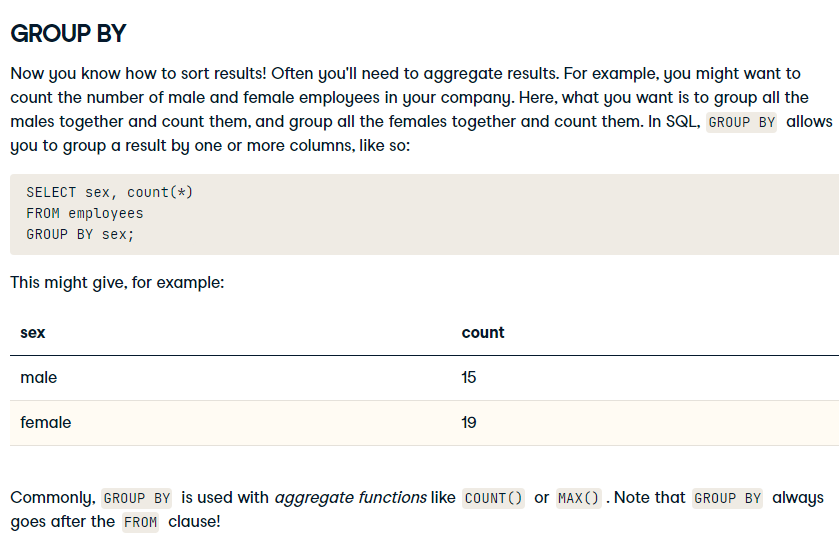

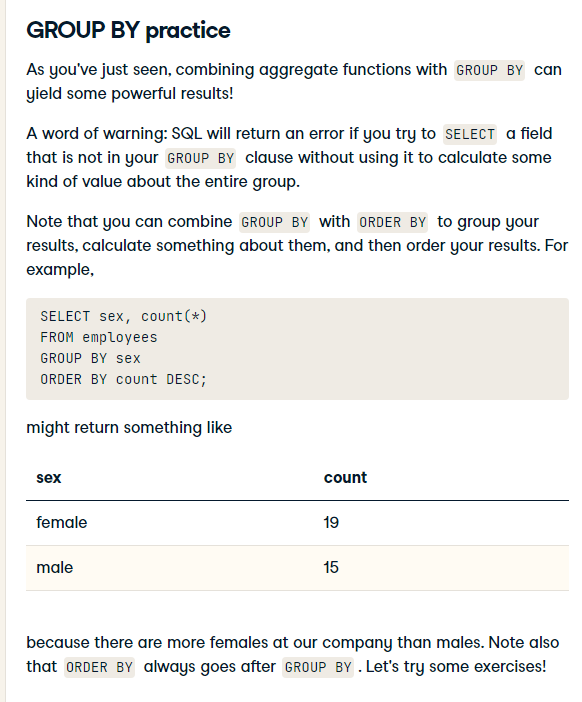

In [ ]:
#Get the release year and count of films released in each year.
SELECT release_year, count(*) FROM films GROUP BY release_year

#Get the release year and average duration of all films, grouped by release year.
SELECT release_year, AVG(duration) FROM films GROUP BY release_year

#Get the release year and largest budget for all films, grouped by release year.
SELECT release_year, MAX(budget) FROM films GROUP BY release_year

#Get the IMDB score and count of film reviews grouped by IMDB score in the reviews table.
SELECT imdb_score, count(*) FROM reviews GROUP BY imdb_score

#Get the release year and lowest gross earnings per release year.
SELECT release_year, MIN(gross) FROM films GROUP BY release_year

#Get the language and total gross amount films in each language made.
SELECT language, SUM(gross) FROM films GROUP BY language

#Get the country and total budget spent making movies in each country.
SELECT country, SUM(budget) FROM films GROUP BY country

#Get the release year, country, and highest budget spent making a film for each year, for each country. Sort your results by release year and country.
SELECT release_year, country, MAX(budget) fROM films GROUP BY release_year, country ORDER BY release_year, country

#Get the country, release year, and lowest amount grossed per release year per country. Order your results by country and release year.
SELECT country, release_year, MIN(gross) FROM films GROUP BY release_year, country ORDER BY country, release_year

In [33]:
sql("SELECT job_title, count(*) FROM employees GROUP BY job_title")

,job_title,count
0,pharmacist,9
1,statistician iv,4
2,geological engineer,8
3,senior quality engineer,10
4,research assistant iii,3
...,...,...
181,automation specialist i,5
182,account representative ii,1
183,web developer i,5
184,payment adjustment coordinator,9


In [49]:
sql("SELECT region_id, AVG(salary) FROM employees GROUP BY region_id ORDER BY AVG DESC LIMIT 5" )

,region_id,avg
0,4,100550.731429
1,7,99136.817073
2,1,97571.134228
3,6,97382.658537
4,5,96906.671642


In [50]:
sql("SELECT department_id, AVG(salary) FROM employees GROUP BY department_id ORDER BY AVG DESC LIMIT 5")

,department_id,avg
0,18,112055.416667
1,21,105020.717949
2,8,103883.755102
3,4,103416.283019
4,9,101959.255319


In [64]:
sql("SELECT region_id, count(*) FROM employees GROUP BY region_id ORDER BY count DESC")

,region_id,count
0,4,175
1,2,164
2,7,164
3,1,149
4,3,137
5,5,134
6,6,123


In [66]:
sql("SELECT region, MAX(hiv) FROM gapminder GROUP BY region")

,region,max
0,Middle East & North Africa,2.6
1,Europe & Central Asia,1.2
2,America,3.1
3,South Asia,0.4
4,Sub-Saharan Africa,25.9
5,East Asia & Pacific,1.3


In [90]:
sql("SELECT year, code, SUM(total_investment) FROM economies GROUP BY year, code")

,year,code,sum
0,2010,SMR,45.008
1,2015,KNA,52.418
2,2015,LBN,NaN
3,2010,GHA,51.770
4,2010,KNA,67.104
...,...,...,...
375,2015,TJK,36.956
376,2015,SAU,69.754
377,2010,SLE,62.178
378,2010,LTU,36.000


In [89]:
sql("SELECT year, income_group, MAX(gdp_percapita) FROM economies GROUP BY year, income_group ORDER BY year, income_group")

,year,income_group,max
0,2010,High income,105573.58
1,2010,Low income,1046.89
2,2010,Lower middle income,4267.04
3,2010,Upper middle income,23411.83
4,2015,High income,100950.49
5,2015,Low income,1049.77
6,2015,Lower middle income,4217.00
7,2015,Upper middle income,17286.92


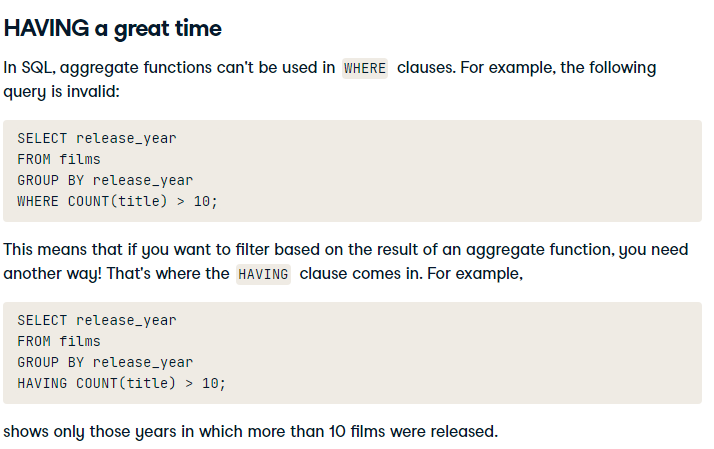

In [ ]:
#In how many different years were more than 200 movies released?
SELECT release_year FROM films GROUP BY release_year HAVING COUNT(title) > 200


#Get the release year, budget and gross earnings for each film in the films table.
SELECT release_year, budget, gross FROM films

#Modify your query so that only records with a release_year after 1990 are included.
SELECT release_year, budget, gross
FROM films WHERE release_year >1990

#Remove the budget and gross columns, and group your results by release year.
SELECT release_year
FROM films
WHERE release_year > 1990
GROUP BY release_year;

#Modify your query to include the average budget and average gross earnings for the results you have so far. Alias the average budget as avg_budget; alias the average gross earnings as avg_gross.
SELECT release_year,AVG(budget) AS avg_budget, AVG(gross) AS avg_gross
FROM films
WHERE release_year > 1990
GROUP BY release_year;


#Modify your query so that only years with an average budget of greater than $60 million are included.
SELECT release_year, AVG(budget) AS avg_budget, AVG(gross) AS avg_gross
FROM films
WHERE release_year > 1990
GROUP BY release_year
HAVING AVG(budget) > 60000000;


#Finally, modify your query to order the results from highest average gross earnings to lowest.
SELECT release_year, AVG(budget) AS avg_budget, AVG(gross) AS avg_gross
FROM films
WHERE release_year > 1990
GROUP BY release_year
HAVING AVG(budget) > 60000000
ORDER BY AVG(gross) DESC;



#Get the country, average budget, and average gross take of countries that have made more than 10 films. Order the result by country name, and limit the number of results displayed to 5. You should alias the averages as avg_budget and avg_gross respectively.
SELECT country, AVG(budget) AS avg_budget, AVG(gross) aS avg_gross
FROM films 
GROUP BY country
HAVING COUNT(title) > 10
ORDER BY country
LIMIT 5

In [96]:
sql("SELECT income_group, COUNT(*) FROM economies GROUP BY income_group HAVING COUNT(income_group) < 150")

,income_group,count
0,Low income,116


In [106]:
sql("SELECT DISTINCT(code), inflation_rate, total_investment FROM economies WHERE gdp_percapita <500 ORDER BY inflation_rate DESC")

,code,inflation_rate,total_investment
0,COD,23.464,13.750
1,MWI,21.858,12.121
2,SLE,17.782,31.089
3,GIN,15.466,9.420
4,MOZ,12.699,18.728
5,ERI,11.228,9.299
6,MDG,9.247,23.424
7,ETH,8.134,25.524
8,LBR,7.742,NaN
9,MWI,7.409,22.823


In [136]:
sql("SELECT code, income_group, AVG(gross_savings) FROM economies GROUP BY code, income_group HAVING AVG(gross_savings)<5.500")

,code,income_group,avg
0,LBN,Upper middle income,3.8335
1,ERI,Low income,-3.9640
2,SLE,Low income,5.2640
3,GIN,Low income,-4.7810
4,GMB,Low income,4.8565
5,VCT,Upper middle income,0.4460
6,GNB,Low income,3.6585
7,YEM,Lower middle income,2.2675
8,CAF,Low income,4.4985
9,MNE,Upper middle income,2.7280


## A taste of things to come
Congrats on making it to the end of the course! By now you should have a good understanding of the basics of SQL.

There's one more concept we're going to introduce. You may have noticed that all your results so far have been from just one table, e.g. films or people.

In the real world however, you will often want to query multiple tables. For example, what if you want to see the IMDB score for a particular movie?

In this case, you'd want to get the ID of the movie from the films table and then use it to get IMDB information from the reviews table. In SQL, this concept is known as a join, and a basic join is shown in the editor to the right.

The query in the editor gets the IMDB score for the film To Kill a Mockingbird! Cool right?

As you can see, joins are incredibly useful and important to understand for anyone using SQL.

In [ ]:
SELECT title, imdb_score
FROM films
JOIN reviews
ON films.id = reviews.film_id
WHERE title = 'To Kill a Mockingbird';

# JOINING TABLES IN SQL 
As the name suggests, the focus of this course is using SQL to join two or more database tables together into a single table, an essential skill for data scientists. In this chapter, you'll learn about the INNER JOIN, which along with LEFT JOIN are probably the two most common JOINs. You'll see diagrams throughout this course that are designed to help you understand the mechanics of the different joins. Let's begin with a diagram showing the layout of some data and then how an INNER JOIN can be applied to that data.

2. Initial data diagram
In the videos in this chapter and the next, we'll often work with two tables named left and right. You can see that matching values of the id field are colored with the same color. The id field is known as a KEY field since it can be used to reference one table to another. Both the left and right tables also have another field named val. This will be useful in helping you see specifically which records and values are included in each join.

3. INNER JOIN diagram
An INNER JOIN only includes records in which the key is in both tables. You can see here that the id field matches for values of 1 and 4 only. With inner joins we look for matches in the right table corresponding to all entries in the key field in the left table.

4. INNER JOIN diagram (2)
So the focus here shifts to only those records with a match in terms of the id field. The records not of interest to INNER JOIN have been faded.

5. INNER JOIN diagram (3)
Here's a resulting single table from the INNER JOIN clause that gives the val field from the right table with records corresponding to only those with id value of 1 or 4, which are colored as yellow and purple. Now that you have a sense for how INNER JOIN works, let's try an example in SQL.

6. prime_ministers table
The prime_ministers table is one of the tables in the leaders database. It is displayed here. Note the countries that are included. Suppose you were interested in determining nations that have both a prime minister and a president AND putting the results into a single table. Next you'll see the presidents table.

7. presidents table
How did I display all of the prime_ministers table in the previous slide? Recall the use of SELECT and FROM clauses as is shown for the presidents table here. Which countries appear in both tables? With small tables like these, it is easy to notice that Egypt, Portugal, Vietnam, and Haiti appear in both tables. For larger tables, it isn't as simple as just picking these countries out visually. So what does the syntax look like for SQL to get the results of countries with a prime minister and a president from these two tables into one?

8. INNER JOIN in SQL
The syntax for completing an INNER JOIN from the prime_ministers table to the presidents table based on a key field of country is shown. Note the use of aliases for prime_ministers as p1 and presidents as p2. This helps to simplify your code, especially with longer table names like prime_ministers and presidents. A SELECT statement is used to select specific fields from the two tables. In this case, since country exists in both tables, we must write p1 and the period to avoid a SQL error. Next we list the table on the left of the inner join after FROM and then we list the table on the right after INNER JOIN. Lastly, we specify the keys in the two tables that we would like to match on.

9. Let's practice!
You'll now practice applying an inner join to two tables and to three tables. Let's get to it!

## Inner join
PostgreSQL was mentioned in the slides but you'll find that these joins and the material here applies to different forms of SQL as well.

Throughout this course, you'll be working with the countries database containing information about the most populous world cities as well as country-level economic data, population data, and geographic data. This countries database also contains information on languages spoken in each country.

You can see the different tables in this database by clicking on the tabs on the bottom right below query.sql. Click through them to get a sense for the types of data that each table contains before you continue with the course! Take note of the fields that appear to be shared across the tables.

Recall from the video the basic syntax for an INNER JOIN, here including all columns in both tables:


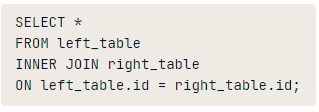

You'll start off with a SELECT statement and then build up to an inner join with the cities and countries tables. Let's get to it!


1. Inner join the cities table on the left to the countries table on the right, keeping all of the fields in both tables.
2. You should match the tables on the country_code field in cities and the code field in countries.
3. Do not alias your tables here or in the next step. Using cities and countries is fine for now.

In [ ]:
SELECT * 
FROM cities
INNER JOIN countries
ON cities.country_code = countries.code;


# use alias now
SELECT cities.name AS city, countries.name AS country, region
FROM cities
  INNER JOIN countries
    ON cities.country_code = countries.code;

In [159]:
sql("SELECT cd.department_name, cd.division_name, e.last_name, e.salary FROM company_departments AS cd INNER JOIN employees as e ON cd.id = e.id")

,department_name,division_name,last_name,salary
0,automotive,auto & hardware,kelley,67470
1,other,non-categorized,alexander,144724
2,beauty,domestic,carr,101768
3,jewelery,fashion,schmidt,85227
4,music,entertainment,medina,106659
5,industrial,auto & hardware,black,44179
6,games,domestic,williamson,65889
7,kids,domestic,webb,59763
8,sports,games & sports,day,109890
9,movies,entertainment,jacobs,141139


## Inner join (2)
Instead of writing the full table name, you can use table aliasing as a shortcut. For tables you also use AS to add the alias immediately after the table name with a space. Check out the aliasing of cities and countries below.

SELECT c1.name AS city, c2.name AS country
FROM cities AS c1
INNER JOIN countries AS c2
ON c1.country_code = c2.code;


Notice that to select a field in your query that appears in multiple tables, you'll need to identify which table/table alias you're referring to by using a . in your SELECT statement.

You'll now explore a way to get data from both the countries and economies tables to examine the inflation rate for both 2010 and 2015.

Sometimes it's easier to write SQL code out of order: you write the SELECT statement after you've done the JOIN.


1. Join the tables countries (left) and economies (right) aliasing countries AS c and economies AS e.
2. Specify the field to match the tables ON.
3. From this join, SELECT: 
    
    c.code, aliased as country_code.  
    name, year, and inflation_rate, not aliased.

In [ ]:
SELECT c.code AS country_code, name, year, inflation_rate
FROM countries AS c
INNER JOIN economies AS e
ON c.code = e.code;

In [178]:
sql("SELECT cd. department_name, cd.division_name, e.last_name, e.salary FROM company_departments AS cd INNER JOIN employees AS e ON cd.id = e.department_id")

,department_name,division_name,last_name,salary
0,electronics,electronic equipment,kelley,67470
1,automotive,auto & hardware,carr,101768
2,automotive,auto & hardware,alexander,144724
3,automotive,auto & hardware,nguyen,108378
4,automotive,auto & hardware,armstrong,89969
...,...,...,...,...
1041,other,non-categorized,johnson,95679
1042,other,non-categorized,spencer,119769
1043,other,non-categorized,perry,146701
1044,other,non-categorized,hudson,146745


Inner join (3)
The ability to combine multiple joins in a single query is a powerful feature of SQL, e.g:

SELECT *
FROM left_table
  INNER JOIN right_table
    ON left_table.id = right_table.id
  INNER JOIN another_table
    ON left_table.id = another_table.id;
    
    As you can see here it becomes tedious to continually write long table names in joins. This is when it becomes useful to alias each table using the first letter of its name (e.g. countries AS c)! It is standard practice to alias in this way and, if you choose to alias tables or are asked to specifically for an exercise in this course, you should follow this protocol.

Now, for each country, you want to get the country name, its region, and the fertility rate and unemployment rate for both 2010 and 2015.

Note that results should work throughout this course with or without table aliasing unless specified differently.


1. Scroll down the query result and take a look at the results for Albania from your previous query. Does something seem off to you?
2. The trouble with doing your last join on c.code = e.code and not also including year is that e.g. the 2010 value for fertility_rate is also paired with the 2015 value for unemployment_rate.
3. Fix your previous query: in your last ON clause, use AND to add an additional joining condition. In addition to joining on code in c and e, also join on year in e and p.

### IMPORTANT

In [ ]:
SELECT c.code, name, region, e.year, fertility_rate, unemployment_rate
  FROM countries AS c
  INNER JOIN populations AS p
    ON c.code = p.country_code
  INNER JOIN economies AS e
    ON c.code = e.code AND e.year = p.year;

In [180]:
sql("SELECT region_name,last_name, start_date, salary FROM company_regions AS cd JOIN employees AS e ON cd.id = e.region_id")

,region_name,last_name,start_date,salary
0,southeast,kelley,2015-09-19,67470
1,northwest,carr,2018-09-20,101768
2,southeast,alexander,2021-10-20,144724
3,nova scotia,nguyen,2021-06-21,108378
4,southwest,armstrong,2017-09-13,89969
...,...,...,...,...
1041,northwest,johnson,2014-09-29,95679
1042,southeast,spencer,2023-04-27,119769
1043,nova scotia,perry,2021-10-06,146701
1044,northeast,hudson,2015-03-30,146745


In [258]:
# JOIN ALL THREE TABLES
sql("SELECT * FROM company_departments AS cd INNER JOIN employees AS e ON cd.id = e.department_id INNER JOIN company_regions as cr ON e.region_id =cr.id")

,id,department_name,division_name,id,last_name,email,start_date,salary,job_title,region_id,department_id,id,region_name,country_name
0,6,electronics,electronic equipment,1,kelley,rkelley0@soundcloud.com,2015-09-19,67470,structural engineer,2,6,2,southeast,usa
1,1,automotive,auto & hardware,1003,carr,fcarr2@woothemes.com,2018-09-20,101768,recruiting manager,3,1,3,northwest,usa
2,1,automotive,auto & hardware,22,alexander,kalexanderl@marketwatch.com,2021-10-20,144724,marketing assistant,2,1,2,southeast,usa
3,1,automotive,auto & hardware,45,nguyen,mnguyen18@biblegateway.com,2021-06-21,108378,electrical engineer,7,1,7,nova scotia,canada
4,1,automotive,auto & hardware,50,armstrong,parmstrong1d@hc360.com,2017-09-13,89969,senior editor,4,1,4,southwest,usa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041,22,other,non-categorized,867,johnson,bjohnsono2@toplist.cz,2014-09-29,95679,associate professor,3,22,3,northwest,usa
1042,22,other,non-categorized,874,spencer,kspencero9@eventbrite.com,2023-04-27,119769,director of sales,2,22,2,southeast,usa
1043,22,other,non-categorized,901,perry,kperryp0@chron.com,2021-10-06,146701,research assistant ii,7,22,7,nova scotia,canada
1044,22,other,non-categorized,935,hudson,mhudsonpy@altervista.org,2015-03-30,146745,assistant media planner,1,22,1,northeast,usa


In [212]:
sql("SELECT region_name, country_name, department_name,last_name, email, salary FROM company_departments AS cd INNER JOIN employees AS e ON cd.id = e.department_id INNER JOIN company_regions as cr ON e.region_id =cr.id WHERE SALARY > 120000 ORDER BY salary DESC")

,region_name,country_name,department_name,last_name,email,salary
0,quebec,canada,health,stanley,bstanleynx@phoca.cz,149929
1,northeast,usa,other,greene,dgreenecc@reuters.com,149835
2,northwest,usa,industrial,morales,dmoralesbl@mit.edu,149598
3,northeast,usa,games,king,bkingkw@friendfeed.com,149597
4,northeast,usa,toys,allen,wallenmz@gnu.org,149586
...,...,...,...,...,...,...
312,northwest,usa,toys,mason,dmasoncu@about.com,120160
313,northeast,usa,electronics,reynolds,dreynoldsro@blogtalkradio.com,120138
314,british columbia,canada,games,cooper,ncooperqh@wp.com,120108
315,quebec,canada,garden,kelly,akellym0@unblog.fr,120086


## INNER JOIN via USING
Congratulations on making it through the first set of exercises on using INNER JOIN to combine two or three tables into one! You'll next learn about the USING keyword in SQL and how it can be used in joins.

2. The INNER JOIN diagram again
Recall the INNER JOIN diagram you saw in the last video. Think about the SQL code needed to complete this diagram. Let's check it out. We select and alias three fields and use the left table on the left of the join and the right table on the right of the join matching based on the entries for the id key field.

3. The INNER JOIN diagram with USING
When the key field you'd like to join on is the same name in both tables, you can use a USING clause instead of the ON clause you have seen so far. Since id is the same name in both the left table and the right table we can specify USING instead of ON here. Note that the parentheses are required around the key field with USING. Let's revisit the example of joining the prime_ministers table

4. Countries with prime ministers and presidents
to the presidents table to determine countries with both types of leaders. How could you fill in the blanks to get the result with USING? (Pause for a few seconds) Did you get it? (PAUSE) Ah, I played a bit of a trick on you here. But why does this work? Since an INNER JOIN includes entries in both tables and both tables contain the countries listed, it doesn't matter the order in which we place the tables in the join if we SELECT these columns. You'll be told in the exercises which table to use on the left and on the right to avoid this confusion. Note again the use of the parentheses around country after USING.

When joining tables with a common field name, e.g.
SELECT *
FROM countries
  INNER JOIN economies
    ON countries.code = economies.code
    
 
You can use USING as a shortcut:

SELECT *
FROM countries
  INNER JOIN economies
    USING(code)
    
You'll now explore how this can be done with the countries and languages tables.


1. Inner join countries on the left and languages on the right with USING(code).
2. Select the fields corresponding to:
3. country name AS country,
4. continent name,
5. language name AS language, and
6. whether or not the language is official.
Remember to alias your tables using the first letter of their names.

In [ ]:
SELECT c.name AS country, continent, l.name AS language, official 
FROM countries  AS c
INNER JOIN languages as l
using(code)

In [167]:
# This is just for exercise. This is not a proper joinin operation as it shoould have been id & department id
sql("SELECT e.last_name, cd.country_name, e.salary FROM company_regions as cd INNER JOIN employees AS e USING(id)")

,last_name,country_name,salary
0,kelley,usa,67470
1,carr,usa,101768
2,williamson,canada,65889
3,ellis,canada,63702
4,murray,usa,96897
5,armstrong,usa,71869
6,phillips,canada,118497


## Self-ish joins, just in CASE
You'll now dive into inner joins where a table is joined with itself. Sounds a little selfish, doesn't it? These types of joins, as you may have guessed, are called self joins. You'll also explore how to slice a numerical field into categories using the CASE command. Joining a table to

2. Join a table to itself?
itself may seem like a bit of a crazy, strange thing to ever want to do. Self-joins are used to compare values in a field to other values of the same field from within the same table. Let's further explore this with an example. Recall the prime_ministers table from earlier. What if you wanted to create a new table showing countries that are in the same continent matched as pairs? Let's explore a chunk of INNER JOIN code using the prime_ministers table.

3. Join prime_ministers to itself?
You might want to pause the video and think about what the resulting table will look like. The country column is selected twice as well as continent. The prime_ministers table is on both the left and the right. The vital step here is setting the key columns by which we match the table to itself. For each country, we will have a match if the country in the "right table" (that is also prime_ministers) is in the same continent. Lastly, since the results of this query are more than can fit on the slide, you'll only see the first 14 records. See how we have exactly this in the result! It's a pairing of each country with every other country in its same continent. But do you see a problem here? We don't want to list the country with itself after all. In the next slide, you'll see a way to do this. Pause to think about how to get around this before continuing. We don't want to include rows

4. Finishing off the self-join on prime_ministers
where the country is the same in the country1 and country2 fields. The AND clause can check that multiple conditions are met. Here a match will not be made between prime_ministers and itself if the countries match. You, thus, have the correct table now; the results here are again limited in order for them to fit on the slide. Notice that self-join doesn't have a syntax quite as simple as INNER JOIN (You can't just write SELF JOIN in SQL code).

5. CASE WHEN and THEN
The next command isn't a join, but is a useful tool in your repertoire. You'll be introduced to using CASE with another table in the leaders database. The states table contains numeric data about different countries in the six inhabited world continents. We'll focus on the field indep_year now. Suppose we'd like to group the year of independence into categories of before 1900, between 1900 and 1930, and after 1930. CASE will get us there! CASE is a way to do multiple if-then-else statements in a simplified way in SQL.

6. Preparing indep_year_group in states
You can now see the basic layout for creating a new field containing the groupings. How might we fill them in? After the first WHEN should specify that we want to check for indep_year being less than 1900. Next we want indep_year_group to contain 'between 1900 and 1930' in the next blank. Lastly any other record not matching these conditions will be assigned the value of 'after 1930' for indep_year_group.

7. Creating indep_year_group in states
Check out the completed query with completed blanks. Notice how the values of indep_year are grouped in indep_year_group. Also observe how continent relates to indep_year_group.

8. Let's practice!
You'll now work on a couple of exercises for practice, then complete a challenge testing your knowledge of the Chapter 1 material.

## Self-join
In this exercise, you'll use the populations table to perform a self-join to calculate the percentage increase in population from 2010 to 2015 for each country code!

Since you'll be joining the populations table to itself, you can alias populations as p1 and also populations as p2. This is good practice whenever you are aliasing and your tables have the same first letter. Note that you are required to alias the tables with self-joins.

1. Join populations with itself ON country_code.
2. Select the country_code from p1 and the size field from both p1 and p2. SQL won't allow same-named fields, so alias p1.size as size2010 and p2.size as size2015.
3. Notice from the result that for each country_code you have four entries laying out all combinations of 2010 and 2015.Extend the ON in your query to include only those records where the p1.year (2010) matches with p2.year - 5 (2015 - 5 = 2010). This will omit the three entries per country_code that you aren't interested in.

4. As you just saw, you can also use SQL to calculate values like p2.year - 5 for you. With two fields like size2010 and size2015, you may want to determine the percentage increase from one field to the next: With two numeric fields  and , the percentage growth from  to  can be calculated as . Add a new field to SELECT, aliased as growth_perc, that calculates the percentage population growth from 2010 to 2015 for each country, using p2.size and p1.size.

In [ ]:
SELECT p1.country_code, p1.size AS size2010, p2.size AS size2015
FROM populations as p1
INNER JOIN populations as p2
ON p1.country_code = p2.country_code;



SELECT p1.country_code,
       p1.size AS size2010,
       p2.size AS size2015
FROM populations as p1
  INNER JOIN populations as p2
    ON p1.country_code = p2.country_code
        AND p1.year = p2.year-5
   

   
    
SELECT p1.country_code,
       p1.size AS size2010, 
       p2.size AS size2015,
       ((p2.size - p1.size)/p1.size * 100.0) AS growth_perc
FROM populations AS p1
  INNER JOIN populations AS p2
    ON p1.country_code = p2.country_code
        AND p1.year = p2.year - 5;

## Case when and then
Often it's useful to look at a numerical field not as raw data, but instead as being in different categories or groups.

You can use CASE with WHEN, THEN, ELSE, and END to define a new grouping field.


1. Using the countries table, create a new field AS geosize_group that groups the countries into three groups:

2. If surface_area is greater than 2 million, geosize_group is 'large'.
3. If surface_area is greater than 350 thousand but not larger than 2 million, geosize_group is 'medium'.
3. Otherwise, geosize_group is 'small'.

In [ ]:
SELECT name, continent, code, surface_area,
    CASE WHEN surface_area > 2000000 THEN 'large'
        WHEN surface_area > 350000 THEN 'medium'
        ELSE 'small' END
        AS geosize_group
FROM countries;

In [240]:
sql("SELECT last_name, job_title, CASE WHEN salary > 100000 THEN 'upper class' WHEN salary > 60000 THEN 'middle class' ELSE 'lower class' END AS class from employees")

,last_name,job_title,class
0,kelley,structural engineer,middle class
1,carr,recruiting manager,upper class
2,alexander,marketing assistant,upper class
3,nguyen,electrical engineer,upper class
4,armstrong,senior editor,middle class
...,...,...,...
1041,johnson,associate professor,middle class
1042,spencer,director of sales,upper class
1043,perry,research assistant ii,upper class
1044,hudson,assistant media planner,upper class


## Inner challenge
The table you created with the added geosize_group field has been loaded for you here with the name countries_plus. Observe the use of (and the placement of) the INTO command to create this countries_plus table:


SELECT name, continent, code, surface_area,
    CASE WHEN surface_area > 2000000
            THEN 'large'
       WHEN surface_area > 350000
            THEN 'medium'
       ELSE 'small' END
       AS geosize_group
INTO countries_plus
FROM countries;


You will now explore the relationship between the size of a country in terms of surface area and in terms of population using grouping fields created with CASE.

By the end of this exercise, you'll be writing two queries back-to-back in a single script. You got this!



1. Using the populations table focused only for the year 2015, create a new field aliased as popsize_group to organize population size into

'large' (> 50 million),
'medium' (> 1 million), and
'small' groups.

2. Select only the country code, population size, and this new popsize_group as fields.

In [ ]:
SELECT country_code, size,
    CASE WHEN size > 50000000 THEN 'large'
        WHEN size > 1000000 THEN 'medium'
        ELSE 'small' END
        AS popsize_group
FROM populations
WHERE year = 2015;

In [266]:
sql("SELECT code, CASE WHEN inflation_rate > 10 THEN 'extreme_inflation' WHEN inflation_rate > 2 THEN 'medium inflation' ELSE 'low inflation' END AS inflation_clas FROM economies")

,code,inflation_clas
0,AFG,medium inflation
1,AFG,low inflation
2,AGO,extreme_inflation
3,AGO,extreme_inflation
4,ALB,medium inflation
...,...,...
755,ZAF,medium inflation
756,ZMB,medium inflation
757,ZMB,extreme_inflation
758,ZWE,medium inflation


1. Use INTO to save the result of the previous query as pop_plus. You can see an example of this in the countries_plus code in the assignment text. Make sure to include a ; at the end of your WHERE clause!

2. Then, include another query below your first query to display all the records in pop_plus using SELECT * FROM pop_plus; so that you generate results and this will display pop_plus in query result.

In [ ]:
SELECT country_code, size,
    CASE WHEN size > 50000000 THEN 'large'
        WHEN size > 1000000 THEN 'medium'
        ELSE 'small' END
        AS popsize_group
INTO pop_plus
FROM populations
WHERE year = 2015;

SELECT *
FROM pop_pluS

1. Keep the first query intact that creates pop_plus using INTO.
2. Write a query to join countries_plus AS c on the left with pop_plus AS p on the right matching on the country code fields.
3. Sort the data based on geosize_group, in ascending order so that large appears on top.
4. Select the name, continent, geosize_group, and popsize_group fields.

In [ ]:
SELECT country_code, size,
  CASE WHEN size > 50000000
            THEN 'large'
       WHEN size > 1000000
            THEN 'medium'
       ELSE 'small' END
       AS popsize_group
INTO pop_plus       
FROM populations
WHERE year = 2015;


SELECT name, continent, geosize_group, popsize_group
FROM countries_plus AS c
  INNER JOIN pop_plus AS p
    ON c.code = p.country_code
ORDER BY geosize_group;

In [264]:
sql("SELECT department_name, last_name FROM company_departments as cd INNER JOIN employees as e ON cd.id = e.department_id ORDER BY salary DESC")

,department_name,last_name
0,health,stanley
1,other,greene
2,industrial,morales
3,games,king
4,toys,allen
...,...,...
1041,industrial,campbell
1042,clothing,andrews
1043,games,stone
1044,jewelery,moore


## 1. LEFT and RIGHT JOINs
Congratulations on completing Chapter 1 on INNER JOINs. Welcome to Chapter 2 on OUTER JOINs! You can remember outer joins as reaching OUT to another table while keeping all of the records of the original table. Inner joins keep only the records IN both tables. You'll begin this chapter by exploring (1) LEFT JOINs, (2) RIGHT JOINs, and (3) FULL JOINs, which are the three types of OUTER JOINs. Let's begin by exploring how a LEFT JOIN differs from an INNER JOIN via a diagram.

2. INNER JOIN diagram
Recall the inner join diagram from Chapter 1. The only records that were included in the resulting table of the INNER JOIN query were those in which the id field had matching values.

3. LEFT JOIN initial diagram
In contrast, a LEFT JOIN notes those records in the left table that do not have a match on the key field in the right table. This is denoted in the diagram by the open circles remaining close to the left table for id values of 2 and 3. These values of 2 and 3 do not appear in the id field of the right table.

4. LEFT JOIN diagram
You now see the result of the LEFT JOIN query. Whereas the INNER JOIN kept just the records corresponding to id values of 1 and 4, a LEFT JOIN keeps all of the original records in the left table but then marks the values as missing in the right table for those that don't have a match. The missing values are marked with dark gray boxes here for clarity. Note that the values of 5 and 6 for id in the right table are not found in the result of LEFT JOIN in any way.

5. Multiple INNER JOIN diagram
It isn't always the case that each key value in the left table corresponds to exactly one record in the key column of the right table. In these examples, we have this layout. Missing entries still occur for ids of 2 and 3 and the value of R3 is brought into the join from right2 since it matches on id 4. Duplicate rows are shown in the LEFT JOIN for id 1 since it has two matches corresponding to the values of R1 and R2 in the right2 table.

6. The syntax of a LEFT JOIN
The syntax of the LEFT JOIN is similar to that of the INNER JOIN. Let's explore the same code you used before to determine the countries with a prime minister and a president, but let's use a LEFT JOIN instead of an INNER JOIN. Further, let's remove continent to save space on the screen. The first four records in this table are the same as those from the INNER JOIN. The last six correspond to the countries that do not have a president and thus their president values are missing.

7. RIGHT JOIN
The RIGHT JOIN is much less common than the LEFT JOIN so we won't spend as much time on it here. The diagram will help you to understand how it works. Instead of matching entries in the id column on the left table TO the id column of the right table, a RIGHT JOIN does the reverse. Therefore, we see open circles on the ids of 5 and 6 in the right table since they are not found in the left table. The resulting table from the RIGHT JOIN shows these missing entries in the L_val field. As you can see in SQL the right table appears after RIGHT JOIN and the left table appears after FROM.

## Left Join
Now you'll explore the differences between performing an inner join and a left join using the cities and countries tables.

You'll begin by performing an inner join with the cities table on the left and the countries table on the right. Remember to alias the name of the city field as city and the name of the country field as country.

You will then change the query to a left join. Take note of how many records are in each query here!

1. Fill in the code based on the instructions in the code comments to complete the inner join. Note how many records are in the result of the join in the query result tab.

In [ ]:
SELECT c1.name AS city, code, c2.name AS country,
       region, city_proper_pop
FROM cities AS c1
  INNER JOIN countries AS c2
    -- Match on country code
    ON c1.country_code = c2.code
ORDER BY code DESC;

In [7]:
sql("SELECT region, code, country_name AS country, name as city, city_proper_pop FROM cities AS c1 INNER JOIN countries AS c2 ON c1.country_code = c2.code ORDER BY code DESC")

,region,code,country,city,city_proper_pop
0,Eastern Africa,ZWE,Zimbabwe,Harare,1606000.0
1,Eastern Africa,ZMB,Zambia,Lusaka,1742979.0
2,Southern Africa,ZAF,South Africa,Cape Town,3740026.0
3,Southern Africa,ZAF,South Africa,Johannesburg,4434827.0
4,Southern Africa,ZAF,South Africa,Durban,3442361.0
...,...,...,...,...,...
225,South America,ARG,Argentina,Buenos Aires,3054300.0
226,Middle East,ARE,United Arab Emirates,Abu Dhabi,1145000.0
227,Middle East,ARE,United Arab Emirates,Dubai,2643410.0
228,Central Africa,AGO,Angola,Luanda,2825311.0


2. Change the code to perform a LEFT JOIN instead of an INNER JOIN. After executing this query, note how many records the query result contains.

In [ ]:
SELECT c1.name AS city, code, c2.name AS country,
       region, city_proper_pop
FROM cities AS c1
  LEFT JOIN countries AS c2
    ON c1.country_code = c2.code
ORDER BY code DESC;

In [275]:
sql("SELECT name AS city, code, name AS country, region, city_proper_pop FROM cities AS c1 LEFT JOIN countries AS c2 ON c1.country_code = c2.code ORDER BY code DESC;")

,city,code,country,region,city_proper_pop
0,Taichung,None,Taichung,None,2752413.0
1,Tainan,None,Tainan,None,1885252.0
2,Kaohsiung,None,Kaohsiung,None,2778918.0
3,Bucharest,None,Bucharest,None,1883425.0
4,Taipei,None,Taipei,None,2704974.0
...,...,...,...,...,...
231,Rosario,ARG,Rosario,South America,1193605.0
232,Abu Dhabi,ARE,Abu Dhabi,Middle East,1145000.0
233,Dubai,ARE,Dubai,Middle East,2643410.0
234,Luanda,AGO,Luanda,Central Africa,2825311.0


Left join (3)
You'll now revisit the use of the AVG() function introduced in our Intro to SQL for Data Science course. You will use it in combination with left join to determine the average gross domestic product (GDP) per capita by region in 2010.

3. Begin with a left join with the countries table on the left and the economies table on the right.
Focus only on records with 2010 as the year.

In [ ]:
SELECT name, region, gdp_percapita
FROM countries AS c
  LEFT JOIN economies AS e
    ON c.code =e.code
WHERE year = 2010;

In [278]:
sql("SELECT country_name, region, gdp_percapita FROM countries as C LEFT JOIN economies AS e ON c.code = e.code WHERE year = 2010")

,country_name,region,gdp_percapita
0,Afghanistan,Southern and Central Asia,539.667
1,Angola,Central Africa,3599.270
2,Albania,Southern Europe,4098.130
3,United Arab Emirates,Middle East,34628.630
4,Argentina,South America,10412.950
...,...,...,...
365,Samoa,Polynesia,3434.100
366,Yemen,Middle East,1266.790
367,South Africa,Southern Africa,7361.940
368,Zambia,Eastern Africa,1456.160


4. Modify your code to calculate the average GDP per capita AS avg_gdp for each region in 2010. Select the region and avg_gdp fields.

In [ ]:
SELECT region, AVG(gdp_percapita) AS avg_gdp
FROM countries AS c
  LEFT JOIN economies AS e
    ON c.code = e.code
WHERE year = 2010
GROUP BY region;

In [279]:
sql("SELECT region, AVG(gdp_percapita) AS avg_gdp FROM countries AS c LEFT JOIN economies AS e ON c.code = e.code WHERE year = 2010 GROUP BY region")

,region,avg_gdp
0,Southern Africa,5051.597974
1,Caribbean,11413.339454
2,Eastern Africa,1757.348162
3,Southern Europe,22926.410911
4,Eastern Asia,26205.851400
5,South America,7420.599233
6,Baltic Countries,12631.029948
7,North America,47911.509766
8,Australia and New Zealand,44792.384766
9,Southern and Central Asia,2797.154994


Arrange this data on average GDP per capita for each region in 2010 from highest to lowest average GDP per capita.

In [ ]:
SELECT region, AVG(gdp_percapita) AS avg_gdp
FROM countries as c
  LEFT JOIN economies as e
    ON c.code = e.code
WHERE year = 2010
GROUP BY region
ORDER BY avg_gdp DESC;

In [280]:
sql(" SELECT region, AVG(gdp_percapita) AS avg_gdp FROM countries As c LEFT JOIN economies AS e ON c.code = e.code WHERE year = 2010 GROUP BY region ORDER BY avg_gdp DESC")

,region,avg_gdp
0,Western Europe,58130.961496
1,Nordic Countries,57073.997656
2,North America,47911.509766
3,Australia and New Zealand,44792.384766
4,British Islands,43588.330078
5,Eastern Asia,26205.851400
6,Southern Europe,22926.410911
7,Middle East,18204.641515
8,Baltic Countries,12631.029948
9,Caribbean,11413.339454


## Right join
Right joins aren't as common as left joins. One reason why is that you can always write a right join as a left join.

The left join code is commented out here. Your task is to write a new query using rights joins that produces the same result as what the query using left joins produces. Keep this left joins code commented as you write your own query just below it using right joins to solve the problem.

Note the order of the joins matters in your conversion to using right joins!

In [ ]:
SELECT cities.name AS city, urbanarea_pop, countries.name AS country,
       indep_year, languages.name AS language, percent
FROM languages
  RIGHT JOIN countries
    ON languages.code = countries.code
  RIGHT JOIN cities
    ON countries.code = cities.country_code
ORDER BY city, language;

In [312]:
sql("SELECT cities.name AS city,urbanarea_pop, countries AS country, indep_year, languages.name AS language FROM languages RIGHT JOIN countries ON languages.code = countries.code RIGHT JOIN cities ON countries.code = cities.country_code ORDER BY city, languages")

,city,urbanarea_pop,country,indep_year,language
0,Abidjan,4765000.0,"(CIV,""Cote d'Ivoire"",Africa,""Western Africa"",3...",1960.0,French
1,Abidjan,4765000.0,"(CIV,""Cote d'Ivoire"",Africa,""Western Africa"",3...",1960.0,French
2,Abidjan,4765000.0,"(CIV,""Cote d'Ivoire"",Africa,""Western Africa"",3...",1960.0,Other
3,Abidjan,4765000.0,"(CIV,""Cote d'Ivoire"",Africa,""Western Africa"",3...",1960.0,Other
4,Abu Dhabi,1145000.0,"(ARE,""United Arab Emirates"",Asia,""Middle East""...",1971.0,Arabic
...,...,...,...,...,...
2738,Zunyi,6127009.0,"(CHN,China,Asia,""Eastern Asia"",9572900,-1523,Z...",-1523.0,Gan
2739,Zunyi,6127009.0,"(CHN,China,Asia,""Eastern Asia"",9572900,-1523,Z...",-1523.0,Hakka
2740,Zunyi,6127009.0,"(CHN,China,Asia,""Eastern Asia"",9572900,-1523,Z...",-1523.0,Hakka
2741,Zunyi,6127009.0,"(CHN,China,Asia,""Eastern Asia"",9572900,-1523,Z...",-1523.0,Other


## FULL JOINs
The last of the three types of OUTER JOINs is the FULL JOIN. In this video, you'll see the differences between a FULL JOIN and the other joins you've learned about. In particular, the instruction will focus on comparing them to INNER JOINs and LEFT JOINs and then to LEFT JOINs and RIGHT JOINs. Let's first review how the diagram changes between an INNER JOIN and a LEFT JOIN for our basic example using the left and right tables. Then we'll delve into the FULL JOIN diagram and its SQL code.

2. INNER JOIN vs LEFT JOIN
Recall that an INNER JOIN keeps only the records that have matching key field values in both tables. A LEFT JOIN keeps all of the records in the left table while bringing in missing values for those key field values that don't appear in the right table. Let's next review the differences between a LEFT JOIN and a RIGHT JOIN.

3. LEFT JOIN vs RIGHT JOIN
Now you can see the differences between a LEFT JOIN and a RIGHT JOIN. The id values of 2 and 3 in the left table do not match with the id values in the right table, so missing values are brought in for them in the LEFT JOIN. Likewise for the RIGHT JOIN, missing values are brought in for id values of 5 and 6.

4. FULL JOIN initial diagram
A FULL JOIN combines a LEFT JOIN and a RIGHT JOIN as you can see by looking at this diagram. So it will bring in all records from both the left and the right table and keep track of the missing values accordingly.

5. FULL JOIN diagram
Note the missing values here and that all six of the values of id are included in the table. You can also see from the SQL code to produce this FULL JOIN result that the general format aligns closely with the SQL syntax you've seen for both an INNER JOIN and a LEFT JOIN. You'll next explore an example from the leaders database.

6. FULL JOIN example using leaders database
Let's revisit the example of looking at countries with prime ministers and/or presidents. We'll walk through the code line by line to do this using a FULL JOIN. The SELECT statement starts us off by including the country field from both of our tables of interest and also the prime_minister and president fields.

7. FULL JOIN example using leaders database
Next, the left table is specified as prime_ministers. Note that the order matters here and if you switched the two tables you'd get slightly different output.

8. FULL JOIN example using leaders database
The right table is specified as presidents with the alias of p2. prime_ministers was aliased as p1 in the previous line.

9. FULL JOIN example using leaders database
Lastly, the join is done based on the key field of country in both tables.

10. FULL JOIN example results using leaders
Time for some practice!

11. Let's practice!

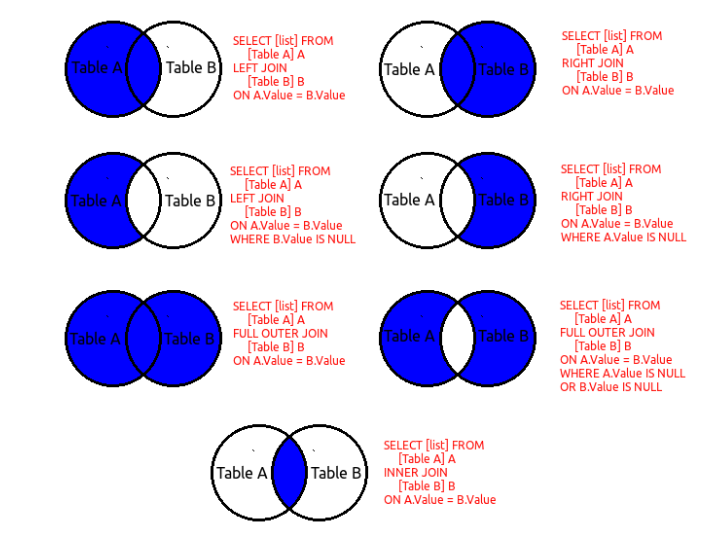

Full join
In this exercise, you'll examine how your results differ when using a full join versus using a left join versus using an inner join with the countries and currencies tables.

You will focus on the North American region and also where the name of the country is missing. Dig in to see what we mean!

Begin with a full join with countries on the left and currencies on the right. The fields of interest have been SELECTed for you throughout this exercise.

Then complete a similar left join and conclude with an inner join.

1. Choose records in which region corresponds to North America or is NULL.

In [ ]:
SELECT country_name AS country, code, region, basic_unit
FROM countries
  FULL JOIN currencies
    USING (code)
WHERE region = 'North America' OR region IS NULL
ORDER BY region;

In [316]:
sql("SELECT country_name as country, code, region, basic_unit FROM countries FULL JOIN currencies USING(code) WHERE region = 'North America' OR region IS NULL ORDER BY region")

,country,code,region,basic_unit
0,Canada,CAN,North America,Canadian dollar
1,United States,USA,North America,United States dollar
2,Bermuda,BMU,North America,Bermudian dollar
3,Greenland,GRL,North America,None
4,None,TMP,None,United States dollar
5,None,FLK,None,Falkland Islands pound
6,None,AIA,None,East Caribbean dollar
7,None,NIU,None,New Zealand dollar
8,None,ROM,None,Romanian leu
9,None,SHN,None,Saint Helena pound


2. Repeat the same query as above but use a LEFT JOIN instead of a FULL JOIN. Note what has changed compared to the FULL JOIN result!

In [ ]:
SELECT name AS country, code, region, basic_unit
FROM countries
  LEFT JOIN currencies
    USING (code)
WHERE region = 'North America' OR region IS NULL
-- 5. Order by region
ORDER BY region;

In [318]:
sql("SELECT country_name AS country, code, region, basic_unit FROM countries LEFT JOIN currencies USING (code) WHERE region = 'North America' OR region IS NULL ORDER BY region")

,country,code,region,basic_unit
0,Bermuda,BMU,North America,Bermudian dollar
1,Canada,CAN,North America,Canadian dollar
2,United States,USA,North America,United States dollar
3,Greenland,GRL,North America,None


3. Repeat the same query as above but use an INNER JOIN instead of a FULL JOIN. Note what has changed compared to the FULL JOIN and LEFT JOIN results!

In [ ]:
SELECT name AS country, code, region, basic_unit
FROM countries
  INNER JOIN currencies
    USING (code)
WHERE region = 'North America' OR region IS NULL
ORDER BY region;

In [319]:
sql("SELECT country_name AS country, code, region, basic_unit FROM countries INNER JOIN currencies USING(code) WHERE region = 'North America' OR region IS NULL ORDER BY region")

,country,code,region,basic_unit
0,Bermuda,BMU,North America,Bermudian dollar
1,Canada,CAN,North America,Canadian dollar
2,United States,USA,North America,United States dollar


## Full join (2)
You'll now investigate a similar exercise to the last one, but this time focused on using a table with more records on the left than the right. You'll work with the languages and countries tables.

Begin with a full join with languages on the left and countries on the right. Appropriate fields have been selected for you again here.

1. Choose records in which countries.name starts with the capital letter 'V' or is NULL. Arrange by countries.name in ascending order to more clearly see the results.

In [ ]:
SELECT countries.name, code, languages.name AS language
FROM languages
  FULL JOIN countries
    USING (code)
WHERE countries.name LIKE 'V%' OR countries.name IS NULL
ORDER BY countries.name;


In [325]:
sql("SELECT countries.country_name, code, languages.name AS language FROM languages FULL JOIN countries USING(code) WHERE countries.country_name LIKE 'V%' OR countries.country_name IS NULL ORDER BY countries.country_name")

,country_name,code,language
0,Vanuatu,VUT,Bislama
1,Vanuatu,VUT,French
2,Vanuatu,VUT,Other
3,Vanuatu,VUT,Tribal Languages
4,Vanuatu,VUT,Tribal Languages
...,...,...,...
99,None,ROM,Romanian
100,None,ROM,Hungarian
101,None,ROM,Romani
102,None,ROM,Other


2. Repeat the same query as above but use a left join instead of a full join. Note what has changed compared to the full join result!

In [ ]:
SELECT countries.name, code, languages.name AS language
FROM languages
  LEFT JOIN countries
    USING (code)
WHERE countries.name LIKE 'V%' OR countries.name IS NULL
ORDER BY countries.name;

In [326]:
sql("SELECT countries.country_name, code, languages.name AS language FROM languages LEFT JOIN countries USING(code) WHERE countries.country_name LIKE 'V%' OR countries.country_name IS NULL ORDER BY countries.country_name")

,country_name,code,language
0,Vanuatu,VUT,Bislama
1,Vanuatu,VUT,French
2,Vanuatu,VUT,Other
3,Vanuatu,VUT,Tribal Languages
4,Vanuatu,VUT,Tribal Languages
...,...,...,...
97,None,NFK,English
98,None,NFK,Other
99,None,ROM,Romanian
100,None,ROM,Hungarian


3. Repeat once more, but use an inner join instead of a left join. Note what has changed compared to the full join and left join results.


In [ ]:
SELECT countries.name, code, languages.name AS language
FROM languages
  INNER JOIN countries
    USING (code)
WHERE countries.name LIKE 'V%' OR countries.name IS NULL
ORDER BY countries.name;

In [327]:
sql("SELECT countries.country_name, code, languages.name AS language FROM languages INNER JOIN countries USING(code) WHERE countries.country_name LIKE 'V%' OR countries.country_name IS NULL ORDER BY countries.country_name")

,country_name,code,language
0,Vanuatu,VUT,Tribal Languages
1,Vanuatu,VUT,Bislama
2,Vanuatu,VUT,English
3,Vanuatu,VUT,French
4,Vanuatu,VUT,Other
5,Vanuatu,VUT,Tribal Languages
6,Vanuatu,VUT,Bislama
7,Vanuatu,VUT,English
8,Vanuatu,VUT,French
9,Vanuatu,VUT,Other


## Full join (3)
You'll now explore using two consecutive full joins on the three tables you worked with in the previous two exercises.


1. Complete a full join with countries on the left and languages on the right.
2. Next, full join this result with currencies on the right.
3. Use LIKE to choose the Melanesia and Micronesia regions (Hint: 'M%esia').
4. Select the fields corresponding to the country name AS country, region, language name AS language, and basic and fractional units of currency.

In [ ]:
SELECT c1.name AS country, region, l.name AS language,
       basic_unit, frac_unit
FROM countries AS c1
  FULL JOIN languages AS l
    USING (code)
  FULL JOIN currencies AS c2
    USING (code)
WHERE region LIKE 'M%esia';

In [328]:
sql("SELECT c1.country_name AS country, region, l.name AS language FROM countries AS c1 FULL JOIN languages as l USING(code) FULL JOIN currencies as c2 USING(code) WHERE region LIKE 'M%esia'")

,country,region,language
0,Guam,Micronesia,English
1,Guam,Micronesia,Filipino
2,Guam,Micronesia,Chamorro
3,Guam,Micronesia,Other Pacific Islander
4,Guam,Micronesia,Asian
...,...,...,...
94,Vanuatu,Melanesia,Bislama
95,Vanuatu,Melanesia,English
96,Vanuatu,Melanesia,French
97,Vanuatu,Melanesia,Other


## CROSSing the Rubicon
Now that you've worked with INNER JOINs and OUTER JOINs it's time to check out the CROSS JOIN. CROSS JOINs create all possible combinations of two tables. Let's explore the diagram for a CROSS JOIN next.

2. CROSS JOIN diagram
In this diagram we have two tables named table1 and table2. Each table only has one field, both with the name of id. The result of the CROSS JOIN is all nine combinations of the id values of 1, 2, and 3 in table1 with the id values of A, B, and C for table2. Next you'll explore an example from the leaders database and look over the SQL syntax for a CROSS JOIN.

3. Pairing prime ministers with presidents
Suppose that all prime ministers in North America and Oceania in the prime_ministers table are scheduled for individual meetings with all presidents in the presidents table. You can look at all of these combinations by using a CROSS JOIN. The syntax here remains similar to what you've seen earlier in the course. We use a WHERE clause to focus on only prime ministers in North America and Oceania in the prime_ministers table. The results of the query give us the pairings for the two prime ministers in North America and Oceania from the prime_ministers table with the seven presidents in the presidents table.

4. Let's practice!
You'll now hop into an exercise focusing on a couple of cities in a tribute to the author Charles Dickens. This chapter closes with a challenge to test your comprehension of the content covered here. Good luck!

## A table of two cities
This exercise looks to explore languages potentially and most frequently spoken in the cities of Hyderabad, India and Hyderabad, Pakistan.

You will begin with a cross join with cities AS c on the left and languages AS l on the right. Then you will modify the query using an inner join in the next tab.


1. Create the cross join as described above. (Recall that cross joins do not use ON or USING.)
2. Make use of LIKE and Hyder% to choose Hyderabad in both countries.
3. Select only the city name AS city and language name AS language.

In [ ]:
SELECT c.name AS city, l.name AS language
FROM cities AS c        
  CROSS JOIN languages AS l
WHERE c.name LIKE 'Hyder%';

In [330]:
sql("SELECT c.name AS city, l.name as language FROM cities AS c CROSS JOIN languages as l WHERE c.name LIKE 'Hyder%'")

,city,language
0,Hyderabad (India),Dari
1,Hyderabad,Dari
2,Hyderabad (India),Pashto
3,Hyderabad,Pashto
4,Hyderabad (India),Turkic
...,...,...
3815,Hyderabad,Tswana
3816,Hyderabad (India),Venda
3817,Hyderabad,Venda
3818,Hyderabad (India),Xhosa


4. Use an inner join instead of a cross join. Think about what the difference will be in the results for this inner join result and the one for the cross join.

In [ ]:
SELECT c.name as city, l.name as language
FROM cities as c      
  INNER JOIN languages AS l
  ON country_code = l.code  
WHERE c.name LIKE 'Hyder%';

In [338]:
sql("SELECT c.name AS city, l.name as language FROM cities AS c INNER JOIN languages as l ON c.country_code = l.code WHERE c.name LIKE 'Hyder%'")

,city,language
0,Hyderabad (India),Hindi
1,Hyderabad (India),Bengali
2,Hyderabad (India),Telugu
3,Hyderabad (India),Marathi
4,Hyderabad (India),Tamil
5,Hyderabad (India),Urdu
6,Hyderabad (India),Gujarati
7,Hyderabad (India),Kannada
8,Hyderabad (India),Malayalam
9,Hyderabad (India),Oriya


## Outer challenge
Now that you're fully equipped to use outer joins, try a challenge problem to test your knowledge!

In terms of life expectancy for 2010, determine the names of the lowest five countries and their regions.

1. Select country name AS country, region, and life expectancy AS life_exp.
2. Make sure to use LEFT JOIN, WHERE, ORDER BY, and LIMIT.

In [ ]:
SELECT c.name AS country, region, p.life_expectancy AS life_exp
FROM countries AS c
LEFT JOIN populations AS p
ON c.code = p.country_code
WHERE year = 2010
ORDER BY life_exp
LIMIT 5

In [347]:
sql("SELECT c.country_name AS country, region, p.life_expectancy AS life_exp FROM countries AS c LEFT JOIN populations AS p ON c.code = p.country_code WHERE year = 2010 ORDER BY life_exp LIMIT 15")

,country,region,life_exp
0,Lesotho,Southern Africa,47.483414
1,Central African Republic,Central Africa,47.625317
2,Sierra Leone,Western Africa,48.228950
3,Swaziland,Southern Africa,48.345757
4,Zimbabwe,Eastern Africa,49.574657
5,Chad,Central Africa,49.862072
6,Cote d'Ivoire,Western Africa,50.151463
7,Angola,Central Africa,50.654170
8,Nigeria,Western Africa,51.329514
9,Mozambique,Eastern Africa,53.226902


## State of the UNION
Welcome to Chapter 3! You've made it through some challenging material so far. Keep up the great work! Next are set theory clauses. In this video, we'll focus on the operations of UNION and UNION ALL. In addition to joining diagrams, in this chapter, you'll also see how Venn diagrams can be used to represent set operations. Let's begin with these Venn diagrams now.

2. Set Theory Venn Diagrams
You can think of each circle as representing a table of data. The shading represents what is included in the result of the set operation from each table. Beginning in the top left, UNION includes every record in both tables but DOES NOT double count those that are in both tables. UNION ALL includes every record in both tables and DOES replicate those that are in both tables. This is why the center is shaded black. The two diagrams on the bottom represent only subsets of data being selected. INTERSECT results in only those records found in both of the two tables. EXCEPT results in only those records in one table BUT NOT the other. Let's investigate what UNION looks like as a joining diagram.

3. UNION diagram
In this diagram, you have two tables with names left_one and right_one. The "one" here corresponds to each table only having one field. If you run a UNION on these two fields you get each record appearing in either table, but notice that the id values of 1 and 4 in right_one are not included again in the UNION since they were already found in the left_one table.

4. UNION ALL diagram
By contrast (with the same two tables left_one and right_one), UNION ALL includes all duplicates in its result. So left_one and right_one both having four records yields eight records for the result of the UNION ALL. If it were the case that right_one had these same four values and also one more value of 1 for id, you'd see three entries for 1 in the resulting UNION ALL. Let's check out the SQL syntax using the leaders database for both UNION and UNION ALL, but first you'll see one more table in the leaders database.

5. monarchs table
Check out the monarchs table in the leaders database that we will use in examples here. The table lists the country, continent, and the name of the monarch for that country. Do some of these names look familiar based on the other tables you've seen? They should! We'll come back to this.

6. All prime ministers and monarchs
You can use UNION on the prime_ministers and monarchs table to show all of the different prime ministers and monarchs in these two tables. The country field is also included here for reference. Note that the prime_minister field has been aliased as leader. In fact, the resulting field from the UNION will have the name of leader. That's an important property of the set theory clauses you will see in this chapter. The fields included in the operation must be of the same data type since they come back as just a single field. You can't stack a number on top of a character field in other words.

7. Resulting table from UNION
Our resulting table from the UNION gives all the leaders and their corresponding country. Does something stand out to you here? (PAUSE)

8. UNION ALL with leaders
The countries of Brunei and Oman were listed only once in the UNION table. These countries have monarchs that also act as prime ministers. This can be seen in the UNION ALL results. You've seen

9. Let's practice!
that UNION and UNION ALL clauses do not do the lookup step that JOINs do. They simply stack records on top of each other from one table to the next.

## Union
Near query result to the right, you will see two new tables with names economies2010 and economies2015.

1. Combine these two tables into one table containing all of the fields in economies2010. The economies table is also included for reference.
2. Sort this resulting single table by country code and then by year, both in ascending order.

In [ ]:
SELECT *
FROM economies2010
UNION
SELECT *
FROM economies2015
ORDER BY code, year;

In [360]:
sql("SELECT * FROM economies2010 UNION SELECT * FROM economies2015 ORDER BY code, year")

,code,year,income_group,gross_savings
0,AFG,2010,Low income,37.133
1,AGO,2010,Upper middle income,23.534
2,ALB,2010,Upper middle income,20.011
3,ARE,2010,High income,27.073
4,ARG,2010,Upper middle income,17.361
...,...,...,...,...
185,WSM,2010,Lower middle income,NaN
186,YEM,2010,Lower middle income,8.250
187,ZAF,2010,Upper middle income,18.012
188,ZMB,2010,Lower middle income,37.404


## Union (2)
UNION can also be used to determine all occurrences of a field across multiple tables. Try out this exercise with no starter code.


1. Determine all (non-duplicated) country codes in either the cities or the currencies table. The result should be a table with only one field called country_code.
2. Sort by country_code in alphabetical order.

In [ ]:
SELECT country_code 
FROM cities
UNION
SELECT code
FROM currencies
ORDER BY country_code;

In [362]:
sql("SELECT country_code FROM cities UNION SELECT code FROM currencies ORDER BY country_code")

,country_code
0,ABW
1,AFG
2,AGO
3,AIA
4,ALB
...,...
200,WSM
201,YEM
202,ZAF
203,ZMB


## Union all
As you saw, duplicates were removed from the previous two exercises by using UNION.

To include duplicates, you can use UNION ALL.

1. Determine all combinations (include duplicates) of country code and year that exist in either the economies or the populations tables. Order by code then year.
2. The result of the query should only have two columns/fields. Think about how many records this query should result in.
3. You'll use code very similar to this in your next exercise after the video. Make note of this code after completing it

In [ ]:
SELECT code, year
FROM economies
UNION ALL
SELECT country_code, year
FROM populations
ORDER BY code, year;

In [363]:
sql("SELECT country_code FROM cities UNION ALL SELECT code FROM currencies ORDER BY country_code")

,country_code
0,ABW
1,AFG
2,AFG
3,AGO
4,AGO
...,...
455,ZWE
456,ZWE
457,ZWE
458,ZWE


## Intersect
Repeat the previous UNION ALL exercise, this time looking at the records in common for country code and year for the economies and populations tables.

1. Again, order by code and then by year, both in ascending order.
2. Note the number of records here (given at the bottom of query result) compared to the similar UNION ALL query result (814 records).

In [ ]:
SELECT code, year
FROM economies
INTERSECT
SELECT country_code, year
FROM populations
ORDER BY code, year;

In [364]:
sql("SELECT code, year FROM economies INTERSECT SELECT country_code, year FROM populations ORDER BY code, year")

,code,year
0,AFG,2010
1,AFG,2015
2,AGO,2010
3,AGO,2015
4,ALB,2010
...,...,...
375,ZAF,2015
376,ZMB,2010
377,ZMB,2015
378,ZWE,2010


## Intersect (2)
As you think about major world cities and their corresponding country, you may ask which countries also have a city with the same name as their country name?

1. Use INTERSECT to answer this question with countries and cities!

In [ ]:
SELECT name
FROM countries
INTERSECT
SELECT name 
FROM cities;

In [368]:
sql("SELECT country_name FROM countries INTERSECT SELECT name FROM cities")

,country_name
0,Singapore
1,Hong Kong


## EXCEPT
Way to go! You've made it to the last of the four set theory clauses in this course. EXCEPT allows you to include only the records that are in one table, but not the other. Let's mix things up and look into the SQL code and result first and then dive into the diagram.

2. Monarchs that aren't prime ministers
You saw earlier that there are some monarchs that also act as the prime minister for their country. One way to determine those monarchs in the monarchs table that do not also hold the title of prime minister is to use the EXCEPT clause. [CLICK] This SQL query selects the monarch field from monarchs and then looks for common entries with the prime_ministers field, while also keeping track of the country for each leader. [CLICK] You can see in the resulting query that only the two European monarchs are not also prime ministers in the leaders database.

3. EXCEPT diagram
This diagram gives the structure of EXCEPT clauses. Only the records that appear in the left table BUT DO NOT appear in the right table are included.

4. Let's practice!
After a couple exercises on using EXCEPT clauses, you'll check out the last two types of joins for the course: semi-joins and anti-joins. I'll see you in the next video for them!

## Except
Get the names of cities in cities which are not noted as capital cities in countries as a single field result.

Note that there are some countries in the world that are not included in the countries table, which will result in some cities not being labeled as capital cities when in fact they are.

1. Order the resulting field in ascending order.
2. Can you spot the city/cities that are actually capital cities which this query misses?

In [ ]:
SELECT name
FROM cities
EXCEPT
SELECT capital
FROM countries
ORDER BY name;

In [369]:
sql("SELECT name FROM cities EXCEPT SELECT capital FROM countries ORDER BY name")

,name
0,Abidjan
1,Ahmedabad
2,Alexandria
3,Almaty
4,Auckland
...,...
165,Yekaterinburg
166,Yokohama
167,Zhengzhou
168,Zhongshan


## Except (2)
Now you will complete the previous query in reverse!

Determine the names of capital cities that are not listed in the cities table.

1. Order by capital in ascending order.
2. The cities table contains information about 236 of the world's most populous cities. The result of your query may surprise you in terms of the number of capital cities that DO NOT appear in this list!

In [ ]:
SELECT capital
FROM countries
EXCEPT
SELECT name
FROM cities
ORDER BY capital;

In [370]:
sql("SELECT capital FROM countries EXCEPT SELECT name FROM cities ORDER BY capital")

,capital
0,Agana
1,Amman
2,Amsterdam
3,Andorra la Vella
4,Antananarivo
...,...
131,Windhoek
132,Yamoussoukro
133,Yaren District
134,Zagreb


## 1. Semi-joins and Anti-joins
You'll now close this chapter by returning to joins. The six joins you've worked with so far are all additive joins in that they add columns to the original "left" table. Can you name all six? (1. INNER JOIN, 2. self-join, 3. LEFT JOIN, 4. RIGHT JOIN, 5. FULL JOIN, and 6. CROSS JOIN).

2. Building up to a semi-join
The last two joins we will cover use a right table to determine which records to keep in the left table. In other words, you use these last two joins (semi-join and anti-join) in a way similar to a WHERE clause dependent on the values of a second table. Let's try out some examples of semi-joins and anti-joins and then return to the diagrams for each. Suppose that you are interested in determining the presidents of countries that gained independence before 1800. Let's first determine which countries this corresponds to in the states table. Recall from your knowledge of SQL before you knew anything about JOINs how this could be done. To get only the countries meeting this condition you can use the WHERE clause. We'll next set up the other part of the query to get the

3. Another step towards the semi-join
presidents we want. What code is needed to retrieve the president, country, and continent columns from the presidents table in that order? [PAUSE] Now we need to use this result with the one in the previous slide to further filter the country field in the presidents table to give us the correct result. Let's see how this might be done next.

4. Finish the semi-join (an intro to subqueries)
In the first query of this example, we determined that Portugal and Spain were both independent before 1800. In the second query, we determined how to display the table in a nice form to answer our question. In order to combine the two tables together we will again use a WHERE clause and then use the first query as the condition to check in the WHERE clause. Check it out! This is your first example of a subquery: a query that sits inside of another query. You'll explore these more in Chapter 4. What does this give as a result? Is it the presidents of Spain and of Portugal? Since Spain does not have a president, it is not included here and only the Portuguese president is listed. The semi-join chooses records in the first table where a condition IS met in a second table. An anti-join chooses records in the first table where a condition IS NOT met in the second table. How might you determine countries in the Americas founded after 1800?

5. An anti-join
Using the code from the previous example, you only need to add a few pieces of code. So what goes in the blanks? [PAUSE] Fill in the WHERE clause by choosing only those continents ending in America and then fill in the other space with a NOT to exclude those countries in the subquery. The presidents of

6. The result of the anti-join
countries in the Americas founded after 1800 are given in the table.

7. Semi-join and anti-join diagrams
The semi-join matches records by key field in the right table with those in the left. It then picks out only the rows in the left table that match that condition. The anti-join picks out those columns in the left table that do not match the condition on the right table. Semi-joins and anti-joins don't have the same built-in SQL syntax that INNER JOIN and LEFT JOIN have. They are useful tools in filtering one table's records on the records of another table.

8. Let's practice!
This chapter's challenge exercise will ask you to combine set theory clauses with semi-joins. Before you get to that, you'll try out some exercises on semi-joins and anti-joins. See you again in Chapter 4!

## Semi-join
You are now going to use the concept of a semi-join to identify languages spoken in the Middle East.

1. Now combine the previous two queries into one query:

2. Add a WHERE IN statement to the SELECT DISTINCT query, and use the commented out query from the first instruction in there. That way, you can determine the unique languages spoken in the Middle East. Carefully review this result and its code after completing it. It serves as a great example of subqueries, which are the focus of Chapter 4.

In [ ]:
SELECT DISTINCT name
FROM languages
WHERE code IN
(SELECT code
FROM countries
WHERE region = 'Middle East')
ORDER BY name;

In [374]:
sql("SELECT DISTINCT name FROM languages WHERE code IN (SELECT code FROM countries WHERE region = 'Middle East') ORDER BY name")

,name
0,Arabic
1,Aramaic
2,Armenian
3,Azerbaijani
4,Azeri
5,Baluchi
6,Bulgarian
7,Circassian
8,English
9,Farsi


## Diagnosing problems using anti-join
Another powerful join in SQL is the anti-join. It is particularly useful in identifying which records are causing an incorrect number of records to appear in join queries.

You will also see another example of a subquery here, as you saw in the first exercise on semi-joins. Your goal is to identify the currencies used in Oceanian countries!

1. Begin by determining the number of countries in countries that are listed in Oceania using SELECT, FROM, and WHERE.

In [ ]:
SELECT COUNT(*)
FROM countries
WHERE continent = 'Oceania';

In [378]:
sql("SELECT COUNT(*) FROM countries WHERE continent = 'Oceania'")

,count
0,19


2. Complete an inner join with countries AS c1 on the left and currencies AS c2 on the right to get the different currencies used in the countries of Oceania.
3. Match ON the code field in the two tables.
4. Include the country code, country name, and basic_unit AS currency. Observe query result and make note of how many different countries are listed here.

In [ ]:
SELECT c1.code, country_name, basic_unit AS currency
FROM countries AS c1
INNER JOIN currencies as c2
ON c1.code = c2.code
WHERE c1.continent = 'Oceania'

In [380]:
sql("SELECT c1.code, country_name, basic_unit AS currency FROM countries AS c1 INNER JOIN currencies as c2 ON c1.code = c2.code WHERE c1.continent = 'Oceania'")

,code,country_name,currency
0,AUS,Australia,Australian dollar
1,PYF,French Polynesia,CFP franc
2,KIR,Kiribati,Australian dollar
3,MHL,Marshall Islands,United States dollar
4,NRU,Nauru,Australian dollar
5,NCL,New Caledonia,CFP franc
6,NZL,New Zealand,New Zealand dollar
7,PLW,Palau,United States dollar
8,PNG,Papua New Guinea,Papua New Guinean kina
9,WSM,Samoa,Samoan tala


5. Note that not all countries in Oceania were listed in the resulting inner join with currencies. Use an anti-join to determine which countries were not included!

Use NOT IN and (SELECT code FROM currencies) as a subquery to get the country code and country name for the Oceanian countries that are not included in the currencies table.

In [ ]:
SELECT code, country_name
FROM countries
WHERE continent = 'Oceania'
AND code NOT IN 
(SELECT code 
FROM currencies);

In [381]:
sql("SELECT code, country_name FROM countries WHERE continent = 'Oceania' AND code NOT IN  (SELECT code FROM currencies); ")

,code,country_name
0,ASM,American Samoa
1,FJI,Fiji Islands
2,GUM,Guam
3,FSM,Micronesia Federated States of
4,MNP,Northern Mariana Islands


## Set theory challenge
Congratulations! You've now made your way to the challenge problem for this third chapter. Your task here will be to incorporate two of UNION/UNION ALL/INTERSECT/EXCEPT to solve a challenge involving three tables.

In addition, you will use a subquery as you have in the last two exercises! This will be great practice as you hop into subqueries more in Chapter 4!


1. Identify the country codes that are included in either economies or currencies but not in populations.
2. Use that result to determine the names of cities in the countries that match the specification in the previous instruction.

In [ ]:
SELECT name
FROM cities AS c1
WHERE country_code IN
(SELECT e.code 
 FROM economies AS e
UNION
SELECT c2.code
 FROM currencies AS c2
EXCEPT
SELECT p.country_code
FROM populations AS p);

In [4]:
sql("SELECT name FROM cities AS c1 WHERE country_code IN (SELECT e.code FROM economies AS e UNION SELECT c2.code FROM currencies AS c2) EXCEPT SELECT p.country_code FROM populations AS p")

,name
0,Shantou
1,Surabaya
2,Cordoba
3,Changchun
4,Recife
...,...
231,Yangon
232,Toronto
233,Ahmedabad
234,Tashkent


## Subqueries inside WHERE and SELECT clauses
You've made it all the way to the last chapter of this course. Congratulations and keep up the excellent work. This last chapter is focused on embedding queries inside of queries. These are called nested queries and also known as subqueries as you saw in Chapter 3. The most common type of subquery is one inside of a WHERE statement. Let's check out another one of these now with a little bit of setting up to do first, of course.

2. Subquery inside WHERE clause set-up
You've seen many examples of using a subquery inside a WHERE clause already with the semi-join and anti-join examples and exercises you just completed. With the WHERE clause being the most common place for a subquery to be found, it's important that you see just one more example of doing so. With this being the final chapter, it's time to unveil the remaining fields in the states table. Note that the continent field is not shown to display all the fields here. The fert_rate field gives an estimate for the average number of babies born per woman in each country. The women_parli_perc field gives the percentage of women in the elected federal parliament for each country. Across these 13 countries, how would you determine the average fertility rate?

3. Average fert_rate
We will use the average fertility rate as part of a subquery. Recall how this is done. The average babies born to women across these countries is 2-point-28 children.

4. Asian countries below average `fert_rate`
Let's use the previous slide's query as a subquery to determine Asian countries that fall under this average. You'll see the code in a couple steps. First we select the country name and the fertility rate for Asian countries.

5. Asian countries below average `fert_rate`
Next, we want to choose records where fert_rate is smaller than What comes next?

6. Asian countries below average `fert_rate`
The subquery is to get the average fertility rate! And now we can check out our result to make sure it makes sense.

7. Asian countries below average `fert_rate`
It appears so. These are the two Asian countries we were looking for with fertility rates below 2-point-28 babies per woman.

8. Subqueries inside SELECT clauses - setup
The second most common type of a subquery is inside of a SELECT clause. The task here is to count the number of countries listed in the states table for each continent in the prime_ministers table. Let's again take the stepwise approach to setting up the problem. What does this code do? [PAUSE] It gives each of the five continents in the prime_ministers table. Let's keep building our answer in the next slide.

9. Subquery inside SELECT clause - complete
Next is determining the counts of the number of countries in states for each of the continents in the last slide. Combining a COUNT clause with a WHERE statement matching the continent fields in the two tables gets us there. Let's check out the code and then discuss a bit further. The subquery involving states also can reference the prime_ministers table in the main query. Any time you do a subquery inside a SELECT statement like this, you need to give the subquery an alias like countries_num here. Please pause the video here and carefully review this code. The result of this query comes next. [PAUSE] It's kinda like magic that this works, huh?! If you haven't discovered it already, there are often many different ways to solve problems with SQL queries. You could use a carefully constructed JOIN to achieve this same result, for example.

10. Let's practice!
Test out your subquery expertise with a few exercises. I'll see you back soon in the subqueries inside FROM clauses video!

## Subquery inside where
You'll now try to figure out which countries had high average life expectancies (at the country level) in 2015.

1. Begin by calculating the average life expectancy across all countries for 2015.

In [ ]:
SELECT AVG(life_expectancy)
FROM populations 
WHERE year = 2015

In [386]:
sql("SELECT AVG(life_expectancy) FROM populations WHERE year = 2015")

,avg
0,71.676342


You'll now try to figure out which countries had high average life expectancies (at the country level) in 2015.

Recall that you can use SQL to do calculations for you. Suppose we wanted only records that were above 1.15 * 100 in terms of life expectancy for 2015:

SELECT *
  FROM populations
WHERE life_expectancy > 1.15 * 100
  AND year = 2015;
  
  
2. Select all fields from populations with records corresponding to larger than 1.15 times the average you calculated in the first task for 2015. In other words, change the 100 in the example above with a subquery.

In [ ]:
SELECT *
FROM populations
WHERE life_expextancy > 1.5 * (SELECT AVG(life_expectancy) FROM populations WHERE year =2015) 
AND year=2015;

In [405]:
sql("SELECT * FROM populations WHERE life_expectancy > 1.15 *(SELECT AVG(life_expectancy) FROM populations WHERE year = 2015) AND year = 2015")

,pop_id,country_code,year,fertility_rate,life_expectancy,size
0,21,AUS,2015,1.833,82.451220,23789800.0
1,376,CHE,2015,1.540,83.197560,8281430.0
2,356,ESP,2015,1.320,83.380486,46444000.0
3,134,FRA,2015,2.010,82.670730,66538400.0
4,170,HKG,2015,1.195,84.278046,7305700.0
5,174,ISL,2015,1.930,82.860980,330815.0
6,190,ITA,2015,1.370,83.490240,60730600.0
7,194,JPN,2015,1.460,83.843660,126958000.0
8,340,SGP,2015,1.240,82.595120,5535000.0
9,374,SWE,2015,1.880,82.551216,9799190.0


3. Make use of the capital field in the countries table in your subquery.
4. Select the city name, country code, and urban area population fields.

In [ ]:
SELECT name, country_code, urbanarea_pop
FROM CITIES
WHERE name IN (SELECT capital FROM countries)
ORDER BY urbanarea_pop DESC;

In [408]:
sql("SELECT name, country_code, urbanarea_pop FROM CITIES WHERE name IN (SELECT capital FROM countries) ORDER BY urbanarea_pop DESC;")

,name,country_code,urbanarea_pop
0,Beijing,CHN,21516000.0
1,Dhaka,BGD,14543124.0
2,Tokyo,JPN,13513734.0
3,Moscow,RUS,12197596.0
4,Cairo,EGY,10230350.0
...,...,...,...
61,Dakar,SEN,1146053.0
62,Abu Dhabi,ARE,1145000.0
63,Tripoli,LBY,1126000.0
64,Yerevan,ARM,1060138.0


The code given in query.sql selects the top nine countries in terms of number of cities appearing in the cities table. Recall that this corresponds to the most populous cities in the world. Your task will be to convert the commented out code to get the same result as the code shown.

In [ ]:
/*
SELECT country_name AS country, COUNT(*) AS cities_num
FROM cities
INNER JOIN countries
ON countries.code = cities.country_code
GROUP BY country
ORDER BY cities_num DESC, country
LIMIT 9;
*/

SELECT country_name AS country,
(SELECT COUNT(*)
FROM cities
WHERE countries.code = cities.country_code) AS cities_num
FROM countries
ORDER BY cities_num DESC, country
LIMIT 9;

In [10]:
sql("SELECT countries.country_name AS country, COUNT(*) AS cities_num FROM cities INNER JOIN countries ON countries.code = cities.country_code GROUP BY country ORDER BY cities_num DESC, country LIMIT 9")

,country,cities_num
0,China,36
1,India,18
2,Japan,11
3,Brazil,10
4,Pakistan,9
5,United States,9
6,Indonesia,7
7,Russian Federation,7
8,South Korea,7


In [9]:
sql("SELECT countries.country_name AS country, (SELECT COUNT(*) FROM cities WHERE countries.code = cities.country_code) AS cities_num FROM countries ORDER BY cities_num DESC, country LIMIT 9")

,country,cities_num
0,China,36
1,India,18
2,Japan,11
3,Brazil,10
4,Pakistan,9
5,United States,9
6,Indonesia,7
7,Russian Federation,7
8,South Korea,7


## Subquery inside the FROM clause
The last basic type of a subquery exists inside of a FROM clause. A motivating example pertaining to the percentage of women in parliament will be used now to help you understand this style of subquery. Let's dig in!

2. Build-up
First, let's determine the maximum percentage of women in parliament for each continent listed in states. Recall that this query will only work if you include continent as one of the fields in the SELECT clause since we are grouping based on that field. Let's check out the result. We see that Europe has the largest value and North America has the smallest value for the countries listed in the states table.

3. Focusing on records in monarchs
What if you weren't interested in all continents, but specifically those in the monarchs table. You haven't seen this yet in the course but you can include multiple tables in a FROM clause by adding a comma between them. Let's investigate a way to get the continents only in monarchs using this new trick. We have at least part of our answer here, but how do we get rid of those duplicate entries? And what about the maximum column?

4. Finishing off the subquery
To get Asia and Europe to appear only once, use the DISTINCT command in your SELECT statement. But now how do you get that maximum column to also come along with Asia and Europe? Instead of including states in the FROM clause, include the subquery instead and alias it with a name like subquery. There you have it! That's how to include a subquery as a temporary table in your FROM clause.

5. Let's practice!
You are very close to the end of the course. Awesome work on making it this far! The last remaining exercises are designed to really test your understanding of the material. You may be a bit frustrated but stick with it and you'll take the knowledge gained in these problems with you as you continue to develop your SQL skills. See you in a bit for the course review video!

## Subquery inside from
The last type of subquery you will work with is one inside of FROM.

You will use this to determine the number of languages spoken for each country, identified by the country's local name! (Note this may be different than the name field and is stored in the local_name field.)

1. Begin by determining for each country code how many languages are listed in the languages table using SELECT, FROM, and GROUP BY.
2. Alias the aggregated field as lang_num.

In [ ]:
SELECT code, count(name) AS lang_num
FROM languages
GROUP BY code;

In [38]:
sql("SELECT code, count(name) AS lang_num FROM languages GROUP BY code")

,code,lang_num
0,PRY,4
1,NRU,6
2,MDG,6
3,ASM,10
4,TZA,8
...,...,...
207,MEX,6
208,QAT,4
209,UZB,8
210,TCD,8


1. Include the previous query (aliased as subquery) as a subquery in the FROM clause of a new query.
2. Select the local name of the country from countries.
3. Also, select lang_num from subquery.
4. Make sure to use WHERE appropriately to match code in countries and in subquery.
5. Sort by lang_num in descending order.

In [ ]:
SELECT local_name, subquery.lang_num
FROM countries, (SELECT code, COUNT(*) AS lang_num
FROM languages
GROUP BY code) AS subquery
WHERE countries.code = subquery.code
ORDER BY lang_num DESC;

In [13]:
sql("SELECT local_name, subquery.lang_num FROM countries, (SELECT code, COUNT(*) AS lang_num FROM languages GROUP BY code) AS subquery WHERE countries.code = subquery.code ORDER BY lang_num DESC")

,local_name,lang_num
0,Zambia,38
1,YeItyop´iya,32
2,Zimbabwe,32
3,Bharat/India,28
4,Nepal,28
...,...,...
194,Republica Dominicana,2
195,The Turks and Caicos Islands,2
196,Nederland,2
197,United Kingdom,2


## Advanced subquery
You can also nest multiple subqueries to answer even more specific questions.

In this exercise, for each of the six continents listed in 2015, you'll identify which country had the maximum inflation rate (and how high it was) using multiple subqueries. The table result of your query in Task 3 should look something like the following, where anything between < > will be filled in with appropriate values:
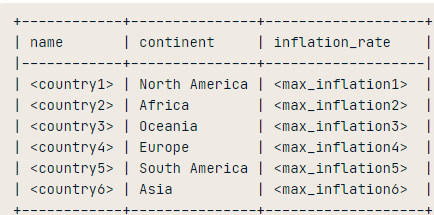
Again, there are multiple ways to get to this solution using only joins, but the focus here is on showing you an introduction into advanced subqueries.

In [ ]:
SELECT name, continent, inflation_rate
FROM countries
INNER JOIN economies
USING (code)
WHERE year = 2015;

In [44]:
sql("SELECT country_name, continent, inflation_rate FROM countries INNER JOIN economies USING(code) WHERE year = 2015")

,country_name,continent,inflation_rate
0,Afghanistan,Asia,-1.549
1,Angola,Africa,10.287
2,Albania,Europe,1.896
3,United Arab Emirates,Asia,4.070
4,Argentina,South America,NaN
...,...,...,...
365,Samoa,Oceania,1.923
366,Yemen,Asia,39.403
367,South Africa,Africa,4.575
368,Zambia,Africa,10.107


In [ ]:
SELECT Max(inflation_rate) as max_inf
FROM (SELECT name, continent, inflation_rate
      FROM countries
      INNER JOIN economies
      USING(code)
      WHERE year =2015) AS subquery
GROUP by continent;

Select the maximum inflation rate in 2015 AS max_inf grouped by continent using the previous step's query as a subquery in the FROM clause.

Thus, in your subquery you should:
1. Create an inner join with countries on the left and economies on the right with USING (without aliasing your tables or columns).
2. Retrieve the country name, continent, and inflation rate for 2015.
3. Alias the subquery as subquery.

This will result in the six maximum inflation rates in 2015 for the six continents as one field table. Make sure to not include continent in the outer SELECT statement.

In [55]:
sql("SELECT continent, Max(inflation_rate) AS max_inf FROM (SELECT country_name,continent, inflation_rate FROM countries INNER JOIN economies USING(code) WHERE year = 2015) AS subquery GROUP BY continent ORDER BY max_inf DESC")

,continent,max_inf
0,South America,121.738
1,Europe,48.684
2,Asia,39.403
3,Africa,21.858
4,Oceania,9.784
5,North America,7.524


Now it's time to append your second query to your first query using AND and IN to obtain the name of the country, its continent, and the maximum inflation rate for each continent in 2015.
For the sake of practice, change all joining conditions to use ON instead of USING.



In [ ]:
SELECT country_name, continent, inflation_rate
FROM countries
INNER JOIN economies
ON countries.code = economies.code
WHERE year = 2015
    AND inflation_rate IN (
        SELECT MAX(inflation_rate) AS max_inf
        FROM (SELECT country_name, continent, inflation_rate
             FROM countries
             INNER JOIN economies
             ON countries.code = economies.code
             WHERE year = 2015) AS subquery
GROUP BY continent);

In [15]:
sql("SELECT country_name, continent, inflation_rate FROM countries INNER JOIN economies USING(code) WHERE year = 2015 AND inflation_rate IN (SELECT MAX(inflation_rate) AS max_inf FROM (SELECT country_name, continent, inflation_rate FROM countries INNER JOIN economies USING(code) WHERE year = 2015) AS subquery GROUP BY continent)")

,country_name,continent,inflation_rate
0,Haiti,North America,7.524
1,Malawi,Africa,21.858
2,Nauru,Oceania,9.784
3,Ukraine,Europe,48.684
4,Venezuela,South America,121.738
5,Yemen,Asia,39.403
6,Haiti,North America,7.524
7,Malawi,Africa,21.858
8,Nauru,Oceania,9.784
9,Ukraine,Europe,48.684


## Subquery challenge
Let's test your understanding of the subqueries with a challenge problem! Use a subquery to get 2015 economic data for countries that do not have

gov_form of 'Constitutional Monarchy' or
'Republic' in their gov_form.
Here, gov_form stands for the form of the government for each country. Review the different entries for gov_form in the countries table.

1. Select the country code, inflation rate, and unemployment rate.
2. Order by inflation rate ascending.
3. Do not use table aliasing in this exercise.

## Final challenge
Welcome to the end of the course! The next three exercises will test your knowledge of the content covered in this course and apply many of the ideas you've seen to difficult problems. Good luck!

Read carefully over the instructions and solve them step-by-step, thinking about how the different clauses work together.

In this exercise, you'll need to get the country names and other 2015 data in the economies table and the countries table for Central American countries with an official language.


1. Select unique country names. Also select the total investment and imports fields.
2. Use a left join with countries on the left. (An inner join would also work, but please use a left join here.)
3. Match on code in the two tables AND use a subquery inside of ON to choose the appropriate languages records.
4. Order by country name ascending.
5. Use table aliasing but not field aliasing in this exercise.

In [ ]:
SELECT DISTINCT(name),total_investment, imports
  FROM countries AS c
    LEFT JOIN economies AS e
      ON (c.code = e.code
        AND c.code IN (
          SELECT l.code
          FROM languages AS l
          WHERE official = 'true'
        ) )
  WHERE region = 'Central America' AND year = '2015'
ORDER BY name;

In [85]:
sql("SELECT DISTINCT(country_name),total_investment, imports FROM countries AS c LEFT JOIN economies AS e ON (c.code = e.code AND c.code IN ( SELECT l.code FROM languages AS l WHERE official = 'true' ) ) WHERE region = 'Central America' AND year = '2015' ORDER BY country_name")

,country_name,total_investment,imports
0,Belize,22.014,6.743
1,Costa Rica,20.218,4.629
2,El Salvador,13.983,8.193
3,Guatemala,13.433,15.124
4,Honduras,24.633,9.353
5,Nicaragua,31.862,11.665
6,Panama,46.557,5.898


## Final challenge (2)
Whoofta! That was challenging, huh?

Let's ease up a bit and calculate the average fertility rate for each region in 2015.

1. Include the name of region, its continent, and average fertility rate aliased as avg_fert_rate.
2. Sort based on avg_fert_rate ascending.
3. Remember that you'll need to GROUP BY all fields that aren't included in the aggregate function of SELECT.

In [ ]:
SELECT region, continent, AVG(fertility_rate) AS avg_fert_rate
  FROM countries AS c
    INNER JOIN populations AS p
      ON c.code = p.country_code
  WHERE year = 2015
GROUP BY continent, region
ORDER BY avg_fert_rate;

In [90]:
sql("SELECT region, continent, AVG(fertility_rate) AS avg_fert_rate FROM countries AS c INNER JOIN populations as p ON c.code = p.country_code WHERE year = 2015 GROUP BY continent, region ORDER BY avg_fert_rate")

,region,continent,avg_fert_rate
0,Southern Europe,Europe,1.426100
1,Eastern Europe,Europe,1.490889
2,Baltic Countries,Europe,1.603333
3,Eastern Asia,Asia,1.620714
4,Western Europe,Europe,1.632500
5,North America,North America,1.765750
6,British Islands,Europe,1.875000
7,Nordic Countries,Europe,1.893333
8,Australia and New Zealand,Oceania,1.911500
9,Caribbean,North America,1.950571


## Final challenge (3)
Welcome to the last challenge problem. By now you're a query warrior! Remember that these challenges are designed to take you to the limit to solidify your SQL knowledge! Take a deep breath and solve this step-by-step.

You are now tasked with determining the top 10 capital cities in Europe and the Americas in terms of a calculated percentage using city_proper_pop and metroarea_pop in cities.

Do not use table aliasing in this exercise.


1. Select the city name, country code, city proper population, and metro area population.
2. Calculate the percentage of metro area population composed of city proper population for each city in cities, aliased as city_perc.
3. Focus only on capital cities in Europe and the Americas in a subquery.
4. Make sure to exclude records with missing data on metro area population.
5. Order the result by city_perc descending.
6. Then determine the top 10 capital cities in Europe and the Americas in terms of this city_perc percentage.

In [104]:
sql("SELECT name, country_code, city_proper_pop, metroarea_pop,  city_proper_pop / metroarea_pop * 100 AS city_perc FROM cities")

,name,country_code,city_proper_pop,metroarea_pop,city_perc
0,Abidjan,CIV,4765000.0,NaN,NaN
1,Abu Dhabi,ARE,1145000.0,NaN,NaN
2,Abuja,NGA,1235880.0,6000000.0,20.598000
3,Accra,GHA,2070463.0,4010054.0,51.631798
4,Addis Ababa,ETH,3103673.0,4567857.0,67.945932
...,...,...,...,...,...
231,Yerevan,ARM,1060138.0,NaN,NaN
232,Yokohama,JPN,3726167.0,NaN,NaN
233,Zhengzhou,CHN,4122087.0,NaN,NaN
234,Zhongshan,CHN,3121275.0,NaN,NaN


In [ ]:
SELECT name, country_code, city_proper_pop, metroarea_pop,  
      city_proper_pop / metroarea_pop * 100 AS city_perc
  FROM cities
  WHERE name IN
    (SELECT capital
     FROM countries
     WHERE (continent = 'Europe'
        OR continent LIKE '%America'))
       AND metroarea_pop IS NOT NULL
ORDER BY city_perc DESC
LIMIT  10;

In [23]:
sql("SELECT name, cities.country_code, cities.city_proper_pop, cities.metroarea_pop, cities.city_proper_pop / cities.metroarea_pop * 100.0 AS city_perc FROM cities WHERE name IN (SELECT capital FROM countries WHERE (continent = 'Europe' OR continent LIKE '%America')) AND metroarea_pop IS NOT NULL ORDER BY city_perc DESC LIMIT  10")

,name,country_code,city_proper_pop,metroarea_pop,city_perc
0,Lima,PER,8852000.0,10750000.0,82.344186
1,Bogota,COL,7878783.0,9800000.0,80.395745
2,Moscow,RUS,12197596.0,16170000.0,75.433494
3,Vienna,AUT,1863881.0,2600000.0,71.687731
4,Montevideo,URY,1305082.0,1947604.0,67.009618
5,Caracas,VEN,1943901.0,2923959.0,66.481815
6,Rome,ITA,2877215.0,4353775.0,66.085523
7,Brasilia,BRA,2556149.0,3919864.0,65.210145
8,London,GBR,8673713.0,13879757.0,62.491822
9,Budapest,HUN,1759407.0,2927944.0,60.090186


# INTERMEDIATE SQL

1. Select the team's long name and API id from the teams_germany table.
2. Filter the query for FC Schalke 04 and FC Bayern Munich using IN, giving you the team_api_IDs needed for the next step.

In [ ]:
SELECT team_long_name, team_api_id
FROM teams_germany
WHERE team_long_name IN ('FC Schalke 04', 'FC Bayern Munich');

3. Create a CASE statement that identifies whether a match in Germany included FC Bayern Munich, FC Schalke 04, or neither as the home team.
4. Group the query by the CASE statement alias, home_team.

## CASE statements comparing column values

1. Select the date of the match and create a CASE statement to identify matches as home wins, home losses, or ties.

In [ ]:
SELECT date,
CASE WHEN home_goal > away_goal THEN 'Home win!'
WHEN home_goal < away_goal THEN 'Home loss :(' 
ELSE 'Tie' END AS outcome
FROM matches_spain;

2. Left join the teams_spain table team_api_id column to the matches_spain table awayteam_id. This allows us to retrieve the away team's identity.
3. Select team_long_name from teams_spain as opponent and complete the CASE statement from Step 1.

In [ ]:
SELECT m.date, t.team_long_name AS opponent, 
CASE WHEN m.home_goal > m.away_goal THEN 'Home win!'
WHEN m.home_goal < m.away_goal THEN 'Home loss :('
ELSE 'Tie' END AS outcome
FROM matches_spain AS m
LEFT JOIN teams_spain AS t
ON m.awayteam_id = t.team_api_id;

4. Complete the same CASE statement as the previous steps.
5. Filter for matches where the home team is FC Barcelona (id = 8634).

In [ ]:
SELECT m.date, t.team_long_name AS opponent,
CASE WHEN m.home_goal > m.away_goal THEN 'Barcelona win!'
WHEN m.home_goal < m.away_goal THEN 'Barcelona loss :(' 
ELSE 'Tie' END AS outcome 
FROM matches_spain AS m
LEFT JOIN teams_spain AS t 
ON m.awayteam_id = t.team_api_id
WHERE m.hometeam_id = 8634; 

1. Complete the CASE statement to identify Barcelona's away team games (id = 8634) as wins, losses, or ties.
2. Left join the teams_spain table team_api_id column on the matches_spain table hometeam_id column. This retrieves the identity of the home team opponent.
3. Filter the query to only include matches where Barcelona was the away team.

In [ ]:
SELECT m.date, t.team_long_name AS opponent,
CASE WHEN m.home_goal < m.away_goal THEN 'Barcelona win!'
WHEN m.home_goal > m.away_goal THEN 'Barcelona loss :(' 
ELSE 'Tie' END AS outcome
FROM matches_spain AS m
LEFT JOIN teams_spain AS t 
ON m.hometeam_id = t.team_api_id
WHERE m.awayteam_id = 8634;

## More complex CASE statements
Barcelona and Real Madrid have been rival teams for more than 80 years. Matches between these two teams are given the name El Clásico (The Classic). In this exercise, you will query a list of matches played between these two rivals.

You will notice in Step 2 that when you have multiple logical conditions in a CASE statement, you may quickly end up with a large number of WHEN clauses to logically test every outcome you are interested in. It's important to make sure you don't accidentally exclude key information in your ELSE clause.

In this exercise, you will retrieve information about matches played between Barcelona (id = 8634) and Real Madrid (id = 8633). Note that the query you are provided with already identifies the Clásico matches using a filter in the WHERE clause.
1. Complete the first CASE statement, identifying Barcelona or Real Madrid as the home team using the hometeam_id column.
2. Complete the second CASE statement in the same way, using awayteam_id.

In [ ]:
SELECT date,
CASE WHEN hometeam_id = 8634 THEN 'FC Barcelona' 
         ELSE 'Real Madrid CF' END AS home,
CASE WHEN awayteam_id = 8634 THEN 'FC Barcelona' 
         ELSE 'Real Madrid CF' END AS away
FROM matches_spain
WHERE (awayteam_id = 8634 OR hometeam_id = 8634)
      AND (awayteam_id = 8633 OR hometeam_id = 8633);

3. Construct the final CASE statement identifying who won each match. Note there are 3 possible outcomes, but 5 conditions that you need to identify.
4. Fill in the logical operators to identify Barcelona or Real Madrid as the winner.

In [ ]:
SELECT date,
CASE WHEN hometeam_id = 8634 THEN 'FC Barcelona' 
         ELSE 'Real Madrid CF' END as home,
CASE WHEN awayteam_id = 8634 THEN 'FC Barcelona' 
         ELSE 'Real Madrid CF' END as away,
CASE WHEN home_goal > away_goal AND hometeam_id = 8634 THEN 'Barcelona win!'
        WHEN home_goal > away_goal AND hometeam_id = 8633 THEN 'Real Madrid win!'
        WHEN home_goal < away_goal AND awayteam_id = 8634 THEN 'Barcelona win!'
        WHEN home_goal < away_goal AND awayteam_id = 8633 THEN 'Real Madrid win!'
        ELSE 'Tie!' END AS outcome
FROM matches_spain
WHERE (awayteam_id = 8634 OR hometeam_id = 8634)
      AND (awayteam_id = 8633 OR hometeam_id = 8633);

## Filtering your CASE statement
Let's generate a list of matches won by Italy's Bologna team! There are quite a few additional teams in the two tables, so a key part of generating a usable query will be using your CASE statement as a filter in the WHERE clause.

CASE statements allow you to categorize data that you're interested in -- and exclude data you're not interested in. In order to do this, you can use a CASE statement as a filter in the WHERE statement to remove output you don't want to see.

Here is how you might set that up

SELECT *
FROM table
WHERE 
    CASE WHEN a > 5 THEN 'Keep'
         WHEN a <= 5 THEN 'Exclude' END = 'Keep';
         
In essence, you can use the CASE statement as a filtering column like any other column in your database. The only difference is that you don't alias the statement in WHERE.


1. Identify Bologna's team ID listed in the teams_italy table by selecting the team_long_name and team_api_id.


In [ ]:
SELECT team_long_name, team_api_id
FROM teams_italy
WHERE team_long_name = 'Bologna';

2. Select the season and date that a match was played.
3. Complete the CASE statement so that only Bologna's home and away wins are identified.

In [ ]:
SELECT season, date,
CASE WHEN hometeam_id = 9857 AND home_goal > away_goal THEN 'Bologna Win'
     WHEN awayteam_id = 9857 AND away_goal > home_goal THEN 'Bologna Win' 
    END AS outcome
FROM matches_italy;

4. Select the home_goal and away_goal for each match.
5. Use the CASE statement in the WHERE clause to filter all NULL values generated by the statement in the previous step.

In [ ]:
SELECT season, date, home_goal, away_goal
FROM matches_italy
WHERE 
CASE WHEN hometeam_id = 9857 AND home_goal > away_goal THEN 'Bologna Win'
WHEN awayteam_id = 9857 AND away_goal > home_goal THEN 'Bologna Win' 
END IS NOT NULL;

## COUNT using CASE WHEN
Do the number of soccer matches played in a given European country differ across seasons? We will use the European Soccer Database to answer this question.

You will examine the number of matches played in 3 seasons within each country listed in the database. This is much easier to explore with each season's matches in separate columns. Using the country and unfiltered match table, you will count the number of matches played in each country during the 2012/2013, 2013/2014, and 2014/2015 match seasons.

1. Create a CASE statement that identifies the id of matches played in the 2012/2013 season. Specify that you want ELSE values to be NULL.
2. Wrap the CASE statement in a COUNT function and group the query by the country alias.

In [ ]:
SELECT c.name AS country,
COUNT(CASE WHEN m.season = '2012/2013' 
THEN m.id ELSE NULL END) AS matches_2012_2013
FROM country AS c
LEFT JOIN match AS m
ON c.id = m.country_id
GROUP BY country;

3. Create 3 CASE WHEN statements counting the matches played in each country across the 3 seasons. END your CASE statement without an ELSE clause.

In [ ]:
SELECT 
c.name AS country,
COUNT(CASE WHEN m.season = '2012/2013' THEN m.id END) AS matches_2012_2013,
COUNT(CASE WHEN m.season = '2013/2014' THEN m.id END) AS matches_2013_2014,
COUNT(CASE WHEN m.season = '2014/2015' THEN m.id END) AS matches_2014_2015
FROM country AS c
LEFT JOIN match AS m
ON c.id = m.country_id
GROUP BY country;

## COUNT and CASE WHEN with multiple conditions
In R or Python, you have the ability to calculate a SUM of logical values (i.e., TRUE/FALSE) directly. In SQL, you have to convert these values into 1 and 0 before calculating a sum. This can be done using a CASE statement.

There's one key difference when using SUM to aggregate logical values compared to using COUNT in the previous exercise --

Your goal here is to use the country and match table to determine the total number of matches won by the home team in each country during the 2012/2013, 2013/2014, and 2014/2015 seasons.


1. Create 3 CASE statements to "count" matches in the '2012/2013', '2013/2014', and '2014/2015' seasons, respectively.
2. Have each CASE statement return a 1 for every match you want to include, and a 0 for every match to exclude.
3. Wrap the CASE statement in a SUM to return the total matches played in each season.
4. Group the query by the country name alias.

In [ ]:
SELECT 
c.name AS country,
SUM(CASE WHEN m.season = '2012/2013' AND m.home_goal > m.away_goal 
        THEN 1 ELSE 0 END) AS matches_2012_2013,
SUM(CASE WHEN m.season = '2013/2014' AND m.home_goal > m.away_goal 
        THEN 1 ELSE 0 END) AS matches_2013_2014,
SUM(CASE WHEN m.season = '2014/2015' AND m.home_goal > m.away_goal 
        THEN 1 ELSE 0 END) AS matches_2014_2015
FROM country AS c
LEFT JOIN match AS m
ON c.id = m.country_id
GROUP BY country;

## Calculating percent with CASE and AVG
CASE statements will return any value you specify in your THEN clause. This is an incredibly powerful tool for robust calculations and data manipulation when used in conjunction with an aggregate statement. One key task you can perform is using CASE inside an AVG function to calculate a percentage of information in your database.

Here's an example of how you set that up:
AVG(CASE WHEN condition_is_met THEN 1
         WHEN condition_is_not_met THEN 0 END)
         
With this approach, it's important to accurately specify which records count as 0, otherwise your calculations may not be correct!

Your task is to examine the number of wins, losses, and ties in each country. The matches table is filtered to include all matches from the 2013/2014 and 2014/2015 seasons.

1. Create 3 CASE statements to COUNT the total number of home team wins, away team wins, and ties, which will allow you to examine the total number of records.

In [ ]:
SELECT c.name AS country,
COUNT(CASE WHEN m.home_goal > m.away_goal THEN m.id END) AS home_wins,
COUNT(CASE WHEN m.home_goal < m.away_goal THEN m.id END) AS away_wins,
COUNT(CASE WHEN m.home_goal = m.away_goal THEN m.id END) AS ties
FROM country AS c
LEFT JOIN matches AS m
ON c.id = m.country_id
GROUP BY country;

2. Calculate the percentage of matches tied using a CASE statement inside AVG.
3. Fill in the logical operators for each statement. Alias your columns as ties_2013_2014 and ties_2014_2015, respectively.


In [ ]:
SELECT 
c.name AS country,
AVG(CASE WHEN m.season='2013/2014' AND m.home_goal = m.away_goal THEN 1
WHEN m.season='2013/2014' AND m.home_goal != m.away_goal THEN 0 END) AS ties_2013_2014,
AVG(CASE WHEN m.season='2014/2015' AND m.home_goal = m.away_goal THEN 1
WHEN m.season='2014/2015' AND m.home_goal!= m.away_goal THEN 0 END) AS ties_2014_2015
FROM country AS c
LEFT JOIN matches AS m
ON c.id = m.country_id
GROUP BY country;

4. The previous "ties" columns returned values with 14 decimal points, which is not easy to interpret. Use the ROUND function to round to 2 decimal points.

In [ ]:
SELECT 
c.name AS country,
ROUND(AVG(CASE WHEN m.season='2013/2014' AND m.home_goal = m.away_goal THEN 1
WHEN m.season='2013/2014' AND m.home_goal != m.away_goal THEN 0 END),2) AS pct_ties_2013_2014,
ROUND(AVG(CASE WHEN m.season='2014/2015' AND m.home_goal = m.away_goal THEN 1
WHEN m.season='2014/2015' AND m.home_goal != m.away_goal THEN 0 END),2) AS pct_ties_2014_2015
FROM country AS c
LEFT JOIN matches AS m
ON c.id = m.country_id
GROUP BY country;

## WHERE are the subqueries?
Welcome back! In this chapter, we will cover the use of simple subqueries to extract and transform your data.

2. What is a subquery?
A subquery is a query nested inside another query. You can tell that there is a subquery in your SQL statement if you have an additional SELECT statement contained inside parentheses, surrounded by another complete SQL statement. So why is this important? Often, in order to retrieve information you want, you have to perform some intermediary transformations to your data before selecting, filtering, or calculating information. Subqueries are a common way of performing this transformation.

3. What do you do with subqueries?
A subquery can be placed in any part of your query -- such as the SELECT, FROM, WHERE, or GROUP BY clause. Where you place it depends on what you want your final data to look like. A subquery can return a variety of information, such as scalar quantities, or numbers, like the ones listed here. A subquery can return a list to use for filtering or joining information, or it can return a table to extract and further transform data.

4. Why subqueries?
So why might you need to use a subquery? Subqueries allow you to compare summarized values to detailed data. For example, compare Liverpool's performance to the entire English Premier League. Subqueries also allow you to better structure or reshape your data for multiple purposes, such as determining the highest monthly average of goals scored in the Bundesliga. Finally, subqueries allow you to combine data from tables where you are unable to perform a join, such as getting both the home and away team names into your results table. We'll discuss all of these questions in the coming lessons.

5. Simple subqueries
Let's start with the definition of a simple subquery. A simple subquery is a query, nested inside another query, that can be run on its own. The example you see here has a subquery in the WHERE clause -- if you copy the entire inner query, "SELECT the average home goal FROM the match table", you can run it on its own and get a result.

6. Simple subqueries
A simple subquery is also evaluated once in the entire query. This means that SQL first processes the information inside the subquery, gets the information it needs, and then moves on to processing information in the OUTER query. Here is the same query you see above. The subquery in WHERE is processed first, generating the overall average of home goals scored. SQL then moves onto the main query, treating the subquery like the single, aggregate value it just generated.

7. Subqueries in the WHERE clause
The first type of simple subquery we'll explore is the subquery in the WHERE clause. These are useful for filtering results based on information you'd have to calculate separately beforehand. Let's generate a list of matches in the 2012/2013 season where the number of home goals scored was higher than overall average. You could calculate the average, and then include that number in the main query...

8. Subqueries in the WHERE clause
...or you could put the query directly into the WHERE clause, inside parentheses. This way, you have one less manual step to perform before getting the results you need.

9. Subquery filtering list with IN
Subqueries are also useful for generating a filtering list. This query answers the question, "Which teams are part of Poland's league?" The "team" table doesn't have the country IDs, but the "match" table has both country and team IDs. By querying a list of hometeam_id's from match where the country_id is 15722, which indicates "Poland", you can generate a list to compare to the team_api_id column IN the WHERE clause.

10. Practice time!
Great! Let's practice creating simple subqueries in the WHERE clause.

## Filtering using scalar subqueries
Subqueries are incredibly powerful for performing complex filters and transformations. You can filter data based on single, scalar values using a subquery in ways you cannot by using WHERE statements or joins. Subqueries can also be used for more advanced manipulation of your data set. You will likely encounter subqueries in any real-world setting that uses relational databases.

In this exercise, you will generate a list of matches where the total goals scored (for both teams in total) is more than 3 times the average for games in the matches_2013_2014 table, which includes all games played in the 2013/2014 season.

1. Calculate triple the average home + away goals scored across all matches. This will become your subquery in the next step. Note that this column does not have an alias, so it will be called ?column? in your results.

In [ ]:
SELECT 3 * AVG(home_goal + away_goal)
FROM matches_2013_2014;

2. Select the date, home goals, and away goals in the main query.
3. Filter the main query for matches where the total goals scored exceed the value in the subquery.

In [ ]:
SELECT date,home_goal,away_goal
FROM  matches_2013_2014
WHERE (home_goal + away_goal) > 
       (SELECT 3 * AVG(home_goal + away_goal)
        FROM matches_2013_2014); 

## Filtering using a subquery with a list
Your goal in this exercise is to generate a list of teams that never played a game in their home city. Using a subquery, you will generate a list of unique hometeam_ID values from the unfiltered match table to exclude in the team table's team_api_ID column.

In addition to filtering using a single-value (scalar) subquery, you can create a list of values in a subquery to filter data based on a complex set of conditions. This type of subquery generates a one column reference list for the main query. As long as the values in your list match a column in your main query's table, you don't need to use a join -- even if the list is from a separate table.

1. Create a subquery in the WHERE clause that retrieves all unique hometeam_ID values from the match table.
2. Select the team_long_name and team_short_name from the team table. Exclude all values from the subquery in the main query.

In [ ]:
SELECT team_long_name,team_short_name
FROM team 
WHERE team_api_id NOT IN
     (SELECT DISTINCT hometeam_id FROM match);

## Filtering with more complex subquery conditions
In the previous exercise, you generated a list of teams that have no home matches listed in the soccer database using a subquery in WHERE. Let's do some further exploration in this database by creating a list of teams that scored 8 or more goals in a home match.

In order to do this, you will construct a subquery in the WHERE statement with its own filtering condition.

1. Create a subquery in WHERE clause that retrieves all hometeam_ID values from match with a home_goal score greater than or equal to 8.
2. Select the team_long_name and team_short_name from the team table. Include all values from the subquery in the main query. 

In [ ]:
SELECT team_long_name, team_short_name
FROM team
WHERE team_api_id IN (SELECT hometeam_ID FROM match WHERE home_goal >= 8);

## Subqueries in the FROM statement
Fantastic! You're really getting the hang of using subqueries. In this lesson, we will cover the use of subqueries in your FROM statement.

2. Subqueries in FROM
You probably noticed that subqueries in WHERE can only return a single column. But what if you want to return a more complex set of results? Subqueries in the FROM statement are a robust tool for restructuring and transforming your data. Often, the data you need to answer a question is not yet in the format necessary to query it directly, and requires some additional processing to prepare for analysis. For example, you may want to transform your data into a different shape, or pre-filter it before making calculations. Subqueries in a FROM statement are a common way of preparing that data. Subqueries in FROM are also useful when calculating aggregates of aggregate information. Let's say you're interested in getting the top 3 teams who scored the highest number of home_goals on average in the 2011/2012 season. You would first calculate the average for each team in the league, and THEN calculate the max value for any team overall. This can be easily accomplished with a subquery in FROM.

3. FROM subqueries...
Let's examine the home_goal average for every team in the database. First, you will create the query that will become your subquery. This query here selects the team's long name from the "team" table, and the AVG of home_goal column from the "match" table. The team table is left joined onto the "match" table using hometeam_id, which will give you the identity of the home team. The query is then filtered by season and grouped by team. The results look like this -- an average value calculated for each team in the table.
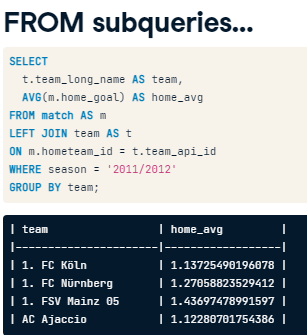

4. ...to main queries!
In order to get only the top team as a final result, place this ENTIRE query without the semicolon inside the FROM statement of an outer query,

5. ...to main queries!
...make sure to give it an alias...
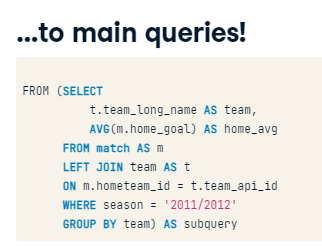
6. ...to main queries!
...then add it to the main query, selecting the team, and home_avg columns from the subquery, just as you would with any other table in the database.

7. ...to main queries!
Finally, don't forget to order by home_avg, descending, and limit the query to 3 results. The final query returns your top 3 teams based on home_goals scored in the 2011/2012 season. And it seems our top team for that season is Barcelona!
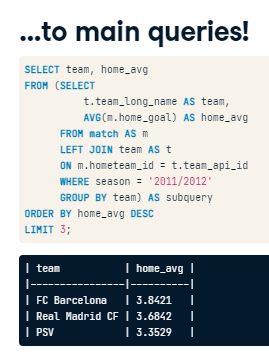
8. Things to remember
There are a few key things to remember when using subqueries in the FROM statement. The first, is that you have the ability to create more than one subquery in the FROM statement of any main query. When you do so, make sure that you give each subquery an alias, and make sure that you are able to JOIN them to each other, just as you would when querying a table from your database. Second, you can join a subquery to any existing table in your database. Again, however, you need to make sure you have a column in the subquery that you can use with the JOIN you'd like to perform.

9. Let's practice!
Fantastic! It's time for you to practice using subqueries in the FROM clause.

## Joining Subqueries in FROM
The match table in the European Soccer Database does not contain country or team names. You can get this information by joining it to the country table, and use this to aggregate information, such as the number of matches played in each country.

If you're interested in filtering data from one of these tables, you can also create a subquery from one of the tables, and then join it to an existing table in the database. A subquery in FROM is an effective way of answering detailed questions that requires filtering or transforming data before including it in your final results.

Your goal in this exercise is to generate a subquery using the match table, and then join that subquery to the country table to calculate information about matches with 10 or more goals in total!

1. Create the subquery to be used in the next step, which selects the country ID and match ID (id) from the match table.
2. Filter the query for matches with greater than or equal to 10 goals.

In [ ]:
SELECT country_id, id 
FROM match
WHERE (home_goal + away_goal) >= 10;

3. Construct a subquery that selects only matches with 10 or more total goals.
4. Inner join the subquery onto country in the main query.
5. Select name from country and count the id column from match.

In [ ]:
SELECTc.name AS country_name,
COUNT(sub.id) AS matches
FROM country AS c
INNER JOIN (SELECT country_id, id 
           FROM match
           WHERE (home_goal + away_goal) >= 10) AS sub
ON c.id = sub.country_id
GROUP BY country_name;

## Building on Subqueries in FROM
In the previous exercise, you found that England, Netherlands, Germany and Spain were the only countries that had matches in the database where 10 or more goals were scored overall. Let's find out some more details about those matches -- when they were played, during which seasons, and how many of the goals were home vs. away goals.

You'll notice that in this exercise, the table alias is excluded for every column selected in the main query. This is because the main query is extracting data from the subquery, which is treated as a single table.

1. Complete the subquery inside the FROM clause. Select the country name from the country table, along with the date, the home goal, the away goal, and the total goals columns from the match table.
2. Create a column in the subquery that adds home and away goals, called total_goals. This will be used to filter the main query.
3. Select the country, date, home goals, and away goals in the main query.
4. Filter the main query for games with 10 or more total goals.

In [ ]:
SELECT country, date, home_goal, away_goal
FROM 
(SELECT c.name AS country, m.date, m.home_goal, m.away_goal, 
(m.home_goal + m.away_goal) AS total_goals
FROM match AS m
LEFT JOIN country AS c
ON m.country_id = c.id) AS subquery
WHERE total_goals >= 10;

## Subqueries in SELECT
So far, we've covered the use of simple subqueries in FROM and WHERE statements. Subqueries can also be included in a SELECT statement to bring summary values into a detailed data set.

2. SELECTing what?
Subqueries in SELECT are used to return a single, aggregate value. This can be fairly useful, since, as you'll recall, you cannot include an aggregate value in an ungrouped SQL query. Subqueries in SELECT are one way to get around that. Subqieries in SELECT are also useful when performing complex mathematical calculations on information in your data set. For example, you may want to see how much an individual score deviates from an average -- say, how higher than the average is this individual score?
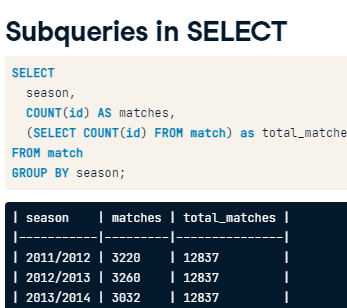
3. Subqueries in SELECT
Including a subquery in SELECT is fairly simple, and is set up the same way you set up subqueries in the WHERE and FROM clauses. Let's say we want to create a column to compare the total number of matches played in each season to the total number of matches played OVERALL. We can first calculate the overall count of matches across all seasons, which is 12,837.

4. Subqueries in SELECT
We can then add that single number to the SELECT statement, which yields the following results...

5. Subqueries in SELECT
...or, we can skip that step, and add the subquery directly to the SELECT statement to get identical results.

6. SELECT subqueries for mathematical calculations
Subqueries in SELECT are also incredibly useful for calculations with the data you are querying. The single value returned by a subquery in select can be used to calculate information based on existing information in a database. For example, the overall average number of goals scored in a match across all seasons is 2.72. If you want to calculate the difference from the average in any given match, you can either calculate this number ahead of time in a separate query, and input the value into the SELECT statement...
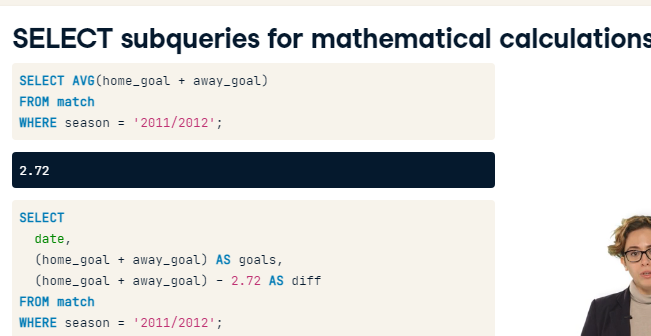
7. Subqueries in SELECT
...or you can use a subquery that calculates this value for you in your SELECT statement, and subtract it from the total goals in that match. Overall, this second option can save you a lot of time and errors in your work, and the results you see here, are identical to calculating the result manually.
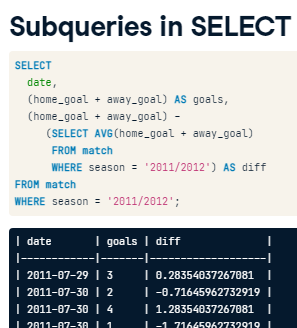
8. SELECT subqueries -- things to keep in mind
There are a few unique considerations when working with subqueries in SELECT. The first is that the subquery needs to return a single value. If your subquery result returns multiple rows, your entire query will generate an error. This is because the information retrieved in a SELECT query is applied identically to each row in the data set -- and that's not possible if there's more than one unit of information. The second thing to keep an eye out is the correct placement of your data's filters in both the main query and the subquery. Here is the query from the previous slide. Since the subquery is processed before the main query, you'll need to include relevant filters in the subquery as well as the main query. Without the WHERE clause you see here in the subquery, the number returned would have been the overall average across all seasons rather than in the 2011/2012 season.

9. Let's practice!
Okay! Let's practice a few examples of subqueries in the SELECT statement

## Add a subquery to the SELECT clause
Subqueries in SELECT statements generate a single value that allow you to pass an aggregate value down a data frame. This is useful for performing calculations on data within your database.

In the following exercise, you will construct a query that calculates the average number of goals per match in each country's league.


1. In the subquery, select the average total goals by adding home_goal and away_goal.
2. Filter the results so that only the average of goals in the 2013/2014 season is calculated.
3. In the main query, select the average total goals by adding home_goal and away_goal. This calculates the average goals for each league.
4. Filter the results in the main query the same way you filtered the subquery. Group the query by the league name.

In [ ]:
SELECT l.name AS league,
ROUND(AVG(m.home_goal + m.away_goal),2) AS avg_goals,
(SELECT ROUND(AVG(home_goal + away_goal),2) 
    FROM match
    WHERE season = '2013/2014') AS overall_avg
FROM league AS l
LEFT JOIN match AS m
ON l.country_id = m.country_id
WHERE m.season = '2013/2014'
GROUP BY l.name;

## Subqueries in Select for Calculations
Subqueries in SELECT are a useful way to create calculated columns in a query. A subquery in SELECT can be treated as a single numeric value to use in your calculations. When writing queries in SELECT, it's important to remember that filtering the main query does not filter the subquery -- and vice versa.

In the previous exercise, you created a column to compare each league's average total goals to the overall average goals in the 2013/2014 season. In this exercise, you will add a column that directly compares these values by subtracting the overall average from the subquery.


1. Select the average goals scored in a match for each league in the main query.
2. Select the average goals scored in a match overall for the 2013/2014 season in the subquery.
3. Subtract the subquery from the average number of goals calculated for each league.
4. Filter the main query so that only games from the 2013/2014 season are included.

In [ ]:
SELECT name AS league,
ROUND(AVG(m.home_goal+ m.away_goal),2) AS avg_goals,
ROUND(AVG(m.home_goal + m.away_goal) - 
(SELECT AVG(home_goal + away_goal)
         FROM match 
         WHERE season = '2013/2014'),2) AS diff
FROM league AS l
LEFT JOIN match AS m
ON l.country_id = m.country_id
WHERE season = '2013/2014'
GROUP BY l.name;

## 1. Subqueries everywhere! And best practices!
Now that you've covered the ways in which you can use subqueries in the SELECT, FROM, and WHERE clauses, let's look at the use of multiple subqueries in one query, and some best practices for making sure your queries are as readable as possible.

2. As many subqueries as you want...
In SQL, you can include as many simple subqueries as you need within multiple clauses within your query. However, your queries can quickly become long, and difficult to read. For example, the query you see here includes a subquery in the SELECT, FROM, and WHERE statements. You don't have to read through this now, but it's worth getting a sense of how extensive SQL queries can get, and discuss some best practices for reading, and writing large queries.

3. Format your queries
The best practice you can start early on in your SQL journey is properly formatting your queries. It's important to properly line up your SELECT, FROM, GROUP BY, and WHERE statements, and all of the information contained in them. This way, you and others you work with can return to a saved query and easily tell if these statements are part of a main query, or a subquery.

4. Annotate your queries
It's also considered best practice to annotate your queries with comments in order to tell the user what it does -- using either a multiple line comment, inside a forward slash, star, and ending with a star, and a forward slash.

5. Annotate your queries
You can also use in-line comments using two dashes. Every piece of information after an in-line comment is treated as text, even if it's a recognized SQL command.

6. Indent your queries
Additionally, make sure that you properly indent all information contained within a subquery. That way, you can easily return to the query and understand what information is being processed first, where you need to apply changes, such as to a range of dates, and what you can expect from your results if you make those changes.
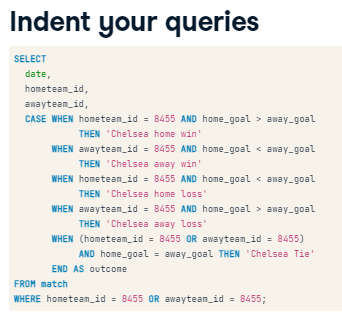
7. Indent your queries
Make sure that you clearly indent all information that's part of a single column, such as a long CASE statement, or a complicated subquery in SELECT. In order to best keep track of all the conditions necessary to set up each WHEN clause, each THEN clause, and how they create the column outcome, it's important to clearly indent each piece of information in the statement. Overall, I highly recommend you read Holywell's SQL Style Guide to get a sense of all the formatting conventions when working with SQL queries.

8. Is that subquery necessary?
When deciding whether or not you need a subquery, it's important to know that each subquery you add requires additional computing power to generate your results. Depending on the size of your database and the number of records you extract in your query, you may significantly increase the amount of time it takes to run your query. So it's always worth asking whether or not a specific subquery is necessary to get the results you need.

9. Properly filter each subquery!
Finally, when constructing a main query with multiple subquery, make sure that your filters are properly placed in every subquery, and the main query, in order to generate accurate results. The query here, for example, filters for the 2013/2014 season in 3 places -- once in the SELECT subquery, once in the WHERE subquery, and once in the main query. This ensures that all data returned is only about matches from the 2013/2014 season.
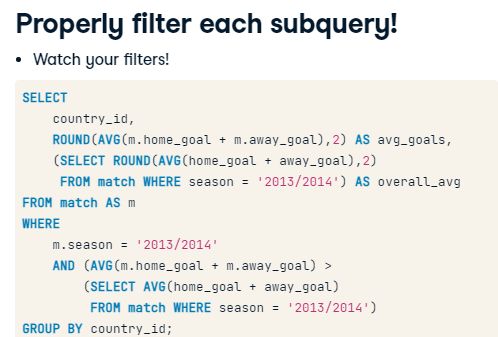
10. Let's practice!
Okay! Time to practice creating complex queries with multiple subqueries.

## ALL the subqueries EVERYWHERE
In soccer leagues, games are played at different stages. Winning teams progress from one stage to the next, until they reach the final stage. In each stage, the stakes become higher than the previous one. The match table includes data about the different stages that each match took place in.

In this lesson, you will build a final query across 3 exercises that will contain three subqueries -- one in the SELECT clause, one in the FROM clause, and one in the WHERE clause. In the final exercise, your query will extract data examining the average goals scored in each stage of a match. Does the average number of goals scored change as the stakes get higher from one stage to the next?

1. Extract the average number of home and away team goals in two SELECT subqueries.
2. Calculate the average home and away goals for the specific stage in the main query.
3. Filter both subqueries and the main query so that only data from the 2012/2013 season is included.
4. Group the query by the m.stage column.

In [ ]:
SELECT m.stage,
    ROUND(AVG(m.home_goal + m.away_goal),2) AS avg_goals,
    ROUND((SELECT AVG(home_goal + away_goal) 
           FROM match 
           WHERE season = '2012/2013'),2) AS overall
FROM match AS m
WHERE season = '2012/2013'
GROUP BY stage
ORDER BY stage;

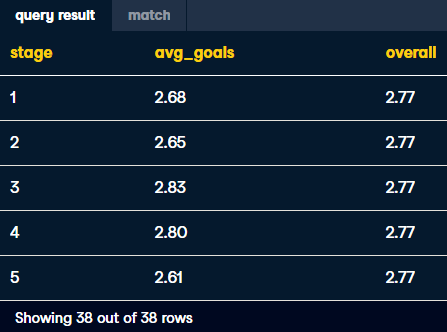

## Add a subquery in FROM
In the previous exercise, you created a data set listing the average home and away goals in each match stage of the 2012/2013 match season.

In this next step, you will turn the main query into a subquery to extract a list of stages where the average home goals in a stage is higher than the overall average for home goals in a match.

1. Calculate the average home goals and average away goals from the match table for each stage in the FROM clause subquery.
2. Add a subquery to the WHERE clause that calculates the overall average home goals.
3. Filter the main query for stages where the average home goals is higher than the overall average.
4. Select the stage and avg_goals columns from the s subquery into the main query.

In [ ]:
SELECT s.stage,
    ROUND(s.avg_goals,2) AS avg_goals
FROM 
    (SELECT
         stage,
         AVG(home_goal + away_goal) AS avg_goals
     FROM match
     WHERE season = '2012/2013'
     GROUP BY stage) AS s
WHERE 
s.avg_goals > (SELECT AVG(home_goal + away_goal) 
FROM match WHERE season = '2012/2013');

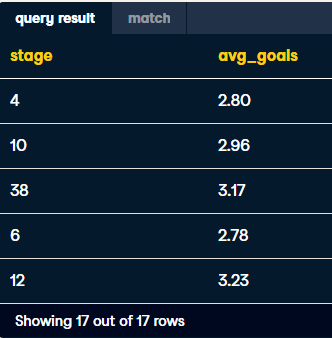

## Add a subquery in SELECT
In the previous exercise, you added a subquery to the FROM statement and selected the stages where the number of average goals in a stage exceeded the overall average number of goals in the 2012/2013 match season. In this final step, you will add a subquery in SELECT to compare the average number of goals scored in each stage to the total.

1. Create a subquery in SELECT that yields the average goals scored in the 2012/2013 season. Name the new column overall_avg.
2. Create a subquery in FROM that calculates the average goals scored in each stage during the 2012/2013 season.
3. Filter the main query for stages where the average goals exceeds the overall average in 2012/2013.

In [ ]:
SELECT 
	-- Select the stage and average goals from s
	s.stage,
	ROUND(s.avg_goals,2) AS avg_goal,
    -- Select the overall average for 2012/2013
	(SELECT AVG(home_goal + away_goal) FROM match WHERE season = '2012/2013') AS overall_avg
FROM 
	-- Select the stage and average goals in 2012/2013 from match
	(SELECT
         stage,
         AVG(home_goal + away_goal) AS avg_goals
     FROM match
     WHERE season = '2012/2013'
     GROUP BY stage) AS s
WHERE 
	-- Filter the main query using the subquery
	s.avg_goals > (SELECT AVG(home_goal + away_goal) 
                   FROM match WHERE season = '2012/2013');

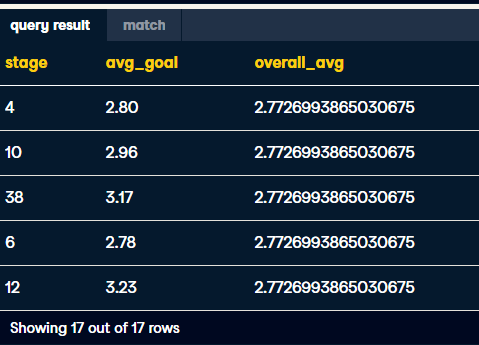

# Correlated subqueries
Welcome back! You're making fantastic progress so far. Now that you've covered the basics of simple subqueries, let's learn how to construct correlated subqueries.

2. Correlated subquery
Correlated subqueries are a special kind of subquery that use values from the outer query in order to generate the final results. The subquery is re-executed each time a new row in the final data set is returned, in order to properly generate each new piece of information. Correlated subqueries are used for special types of calculations, such as advanced joining, filtering, and evaluating of data in the database.

3. A simple example
Let's walk through an example of one of these queries. In the previous chapter, you completed an exercise that answered the question, "Which match stages, where the stakes get higher in each stage, tend to have a higher than average number of goals scored?"
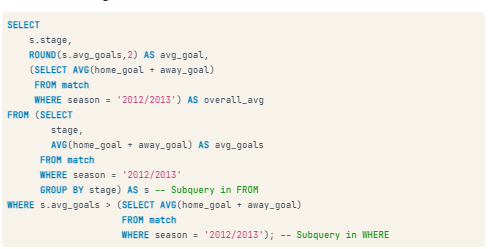
4. A simple example
You achieved this using 3 simple subqueries in the SELECT, FROM, and WHERE statements. However, the same output can also be produced with a correlated subquery. Let's focus on the subquery in the WHERE statement.

5. A correlated example
This query has only one difference -- instead of including a filter by season, the WHERE clause filters for data where the outer table's match stage, pulled from the subquery in FROM, is HIGHER than the overall average generated in the WHERE subquery. The entire WHERE statement is saying, in essence, "return stages where the values in the subquery are higher than the average."
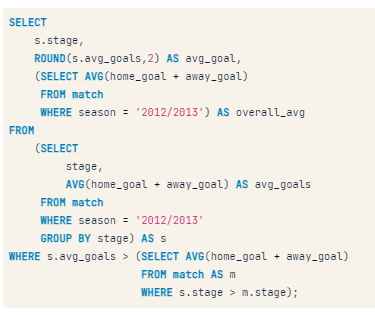
6. A correlated example
Here are the results generated by this query. This may seem a bit complicated, but with a few more examples and a bit of practice, you will start to get the hang of how useful correlated subqueries can be.

7. Simple vs. correlated subqueries
Let's quickly walk through some key differences between simple and correlated subqueries. Simple subqueries can be used in extracting, structuring or filtering information, and can run independent of the main query. In contrast, a correlated subquery cannot be executed on its own because it's dependent on values in the main query. Additionally, a simple subquery is evaluated once in the entire statement. A correlated subquery is evaluated in loops -- once for each row generated by the data set. This means that adding correlated subqueries will slow down your query performance, since your query is recalculating information over and over. Be careful not to include too many correlated subqueries -- or your query may take a long time to run!

8. Correlated subqueries
Here's another, smaller example of a query in which you can use a correlated subquery. Let's answer the question, "What is the average number of goals scored in each country across all match seasons?" This is an an easy enough question, right? You simply join the match table to the country table on the country's id, and extract the country's name, take an average of the goals scored, and group the entire query by the country's name, yielding one row with an average value per country.
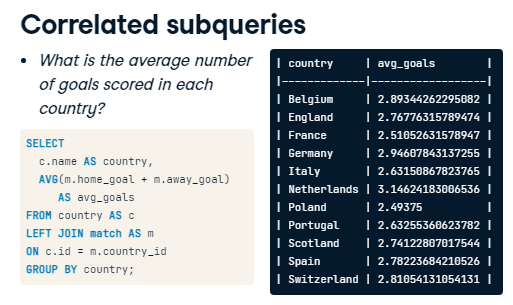
9. Correlated subqueries
A correlated subquery can be used here in lieu of a join. Take a look at the outer query first. The name of the country is selected from the country table, aliased as "c". The second column selected is a scalar subquery, selecting the average total goals scored across all seasons from the match table. You'll notice that the WHERE clause asks SQL to return values where the inner, match table's country_id column matches the c.id column in the outer query's country table. This way, the entire join is replaced, and the results are identical.
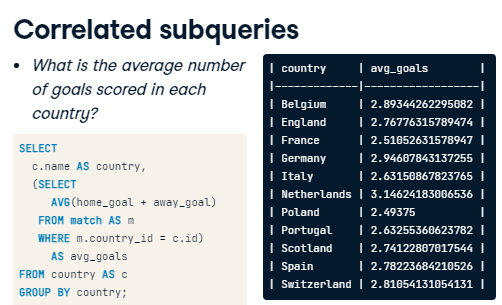
10. Let's practice!
Okay! It's time to practice using correlated subqueries.

## Basic Correlated Subqueries
Correlated subqueries are subqueries that reference one or more columns in the main query. Correlated subqueries depend on information in the main query to run, and thus, cannot be executed on their own.

Correlated subqueries are evaluated in SQL once per row of data retrieved -- a process that takes a lot more computing power and time than a simple subquery.

In this exercise, you will practice using correlated subqueries to examine matches with scores that are extreme outliers for each country -- above 3 times the average score!

1. Select the country_id, date, home_goal, and away_goal columns in the main query.
2. Complete the AVG value in the subquery.
3. Complete the subquery column references, so that country_id is matched in the main and subquery.

In [ ]:
SELECT 
	-- Select country ID, date, home, and away goals from match
	main.country_id,
    main.date,
    main.home_goal, 
    main.away_goal
FROM match AS main
WHERE 
	-- Filter the main query by the subquery
	(home_goal + away_goal) > 
        (SELECT AVG((sub.home_goal + sub.away_goal) * 3)
         FROM match AS sub
         -- Join the main query to the subquery in WHERE
         WHERE main.country_id = sub.country_id);

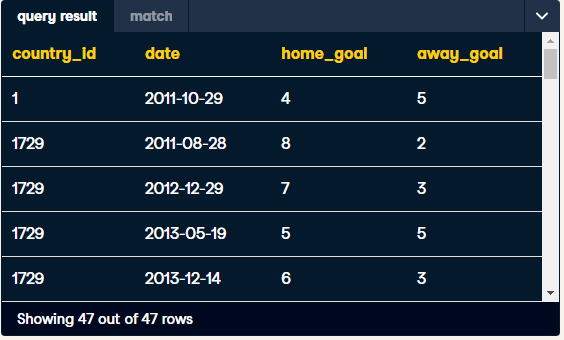

## Correlated subquery with multiple conditions
Correlated subqueries are useful for matching data across multiple columns. In the previous exercise, you generated a list of matches with extremely high scores for each country. In this exercise, you're going to add an additional column for matching to answer the question -- what was the highest scoring match for each country, in each season?

*Note: this query may take a while to load.

1. Select the country_id, date, home_goal, and away_goal columns in the main query.
2. Complete the subquery: Select the matches with the highest number of total goals.
3. Match the subquery to the main query using country_id and season.
4. Fill in the correct logical operator so that total goals equals the max goals recorded in the subquery.

In [ ]:
SELECT 
	-- Select country ID, date, home, and away goals from match
	main.country_id,
    main.date,
    main.home_goal,
    main.away_goal
FROM match AS main
WHERE 
	-- Filter for matches with the highest number of goals scored
	(home_goal + away_goal) = 
        (SELECT MAX(sub.home_goal + sub.away_goal)
         FROM match AS sub
         WHERE main.country_id = sub.country_id
               AND main.season = sub.season);

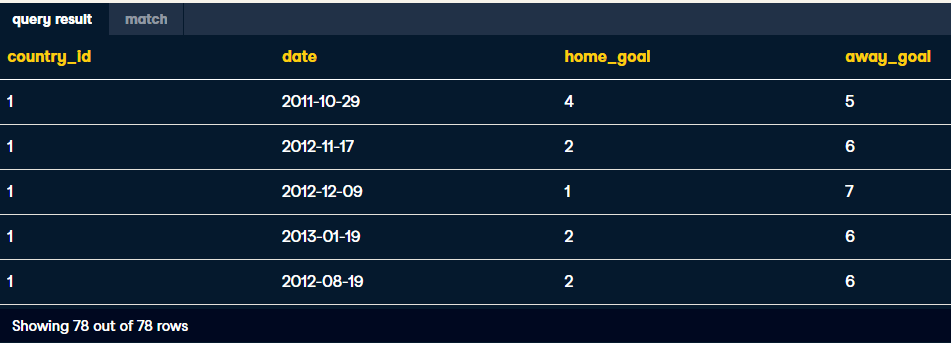

## Nested subqueries
Building on the previous lesson, another important type of subquery to learn is the nested subquery.

2. Nested subqueries?
Nested subqueries are exactly as they sound -- subqueries nested inside other subqueries. As you saw in the previous chapter, information in a database is often not in the format you need to answer a question. Some types of questions you answer may require multiple layers of transformation and filtering of data before you extracting it into the main query.

3. A subquery...
Let's start with an example. The query you see here is similar to a previous lesson where we selected the average number of goals scored in a match within each country, and compared it to the overall average using a subquery in SELECT. This third column calculates the difference between each country, and the overall average.

4. A subquery...
The resulting table looks like this, with one row for each country, and one column for each of the two calculations.

5. ...inside a subquery!
Let's answer a similar question with an additional layer -- How does each month's total goals differ from the monthly average of goals scored? The query here, similar to the previous one, answers this question. Let's take some time to walk through the necessary steps to get this result.
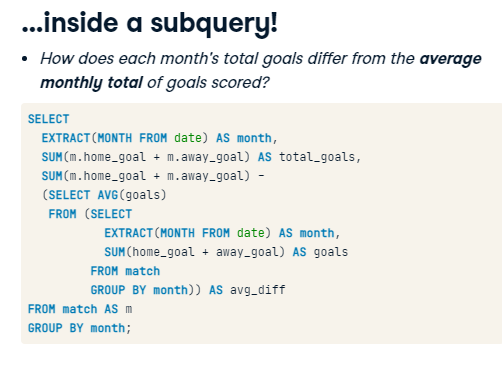
6. Inner subquery
The subquery logic reads like this -- first, select the sum of goals scored in each month. The month is queried using the EXTRACT function, FROM the date. Here are the results of that first, inner subquery, which includes results for months 1 through 12.
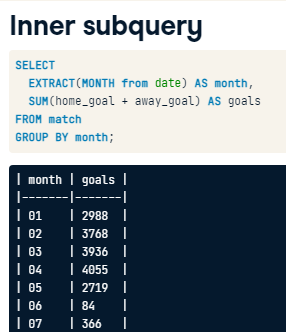
7. Outer subquery
Next, you can place the subquery into the second, outer subquery to calculate an average of the values generated in the previous table, giving you the average monthly goals scored. Since this result is a scalar subquery, you can now place it in the main query for calculating the final data set.
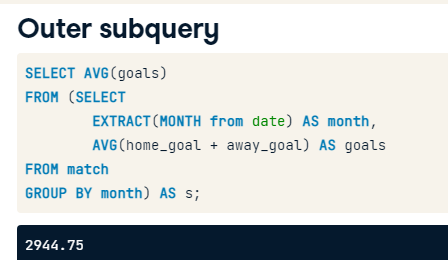
8. Final query
Finally, you can place the entire nested subquery in the SELECT statement, giving you a scalar value to compare to the SUM of goals scored in each month. Here are the first 4 rows of the final query, which generates a sum of goals scored in the month, and a column subtracting the goals scored, from the overall monthly average.
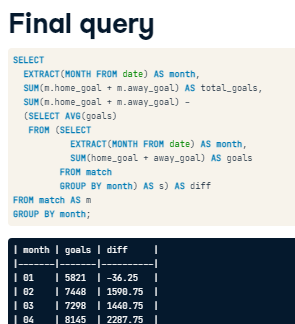
9. Correlated nested subqueries
It's important to also note that nested queries can be correlated or uncorrelated. They can also be a combination of the two -- the inner subquery can be correlated, the outer uncorrelated, or vice versa! And each of the correlated subqueries can reference information from an outer subquery, or the main query. It entirely depends on the problem you're looking to solve. Let's look at an example.

10. Correlated nested subqueries
Let's look at another example here. This query answers the question, What is each country's average goals scored in a match in the 2011/2012 season? This is fairly similar to the previous chapter, except it takes one additional step.
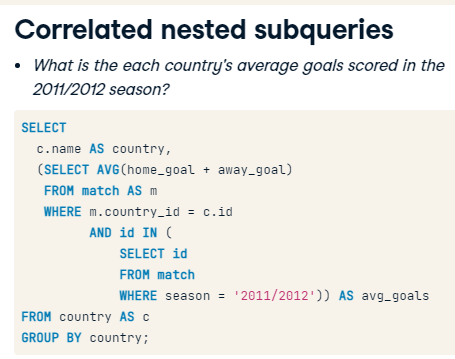
11. Correlated nested subqueries
It has a second, nested subquery inside the SELECT statement,
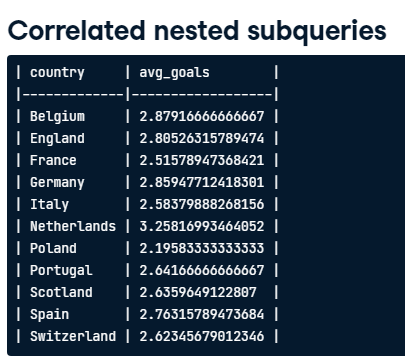
12. Correlated nested subquery
and the outer subquery has a statement correlating with the main query.

13. Correlated nested subqueries
The result you see here is a table with a column that identifies each country's average goals scored in the 2011/2012 season.

14. Let's practice!
Okay! Let's practice creating some nested subqueries.

## Nested simple subqueries
Nested subqueries can be either simple or correlated.

Just like an unnested subquery, a nested subquery's components can be executed independently of the outer query, while a correlated subquery requires both the outer and inner subquery to run and produce results.

In this exercise, you will practice creating a nested subquery to examine the highest total number of goals in each season, overall, and during July across all seasons.

1. Complete the main query to select the season and the max total goals in a match for each season. Name this max_goals.
2. Complete the first simple subquery to select the max total goals in a match across all seasons. Name this overall_max_goals.
3. Complete the nested subquery to select the maximum total goals in a match played in July across all seasons.
4. Select the maximum total goals in the outer subquery. Name this entire subquery july_max_goals.

In [ ]:
SELECT
	-- Select the season and max goals scored in a match
	season,
    MAX(home_goal + away_goal) AS max_goals,
    -- Select the overall max goals scored in a match
   (SELECT MAX(home_goal + away_goal) FROM match) AS overall_max_goals,
   -- Select the max number of goals scored in any match in July
   (SELECT MAX(home_goal + away_goal) 
    FROM match
    WHERE id IN (
          SELECT id FROM match WHERE EXTRACT(MONTH FROM date) = 07)) AS july_max_goals
FROM match
GROUP BY season;

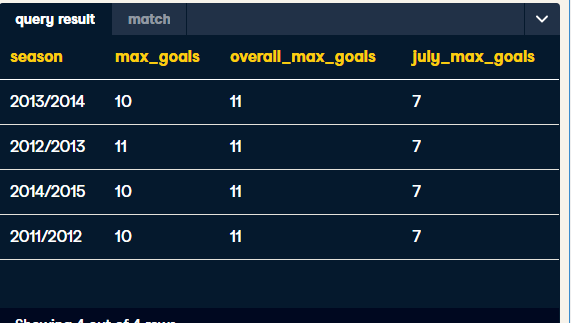

## Nest a subquery in FROM
What's the average number of matches per season where a team scored 5 or more goals? How does this differ by country?

Let's use a nested, correlated subquery to perform this operation. In the real world, you will probably find that nesting multiple subqueries is a task you don't have to perform often. In some cases, however, you may find yourself struggling to properly group by the column you want, or to calculate information requiring multiple mathematical transformations (i.e., an AVG of a COUNT).

Nesting subqueries and performing your transformations one step at a time, adding it to a subquery, and then performing the next set of transformations is often the easiest way to yield accurate information about your data. Let's get to it!

1. Generate a list of matches where at least one team scored 5 or more goals.

In [ ]:
-- Select matches where a team scored 5+ goals
SELECT
	country_id,
    season,
	id
FROM match
WHERE home_goal >=5 OR away_goal >=5;

2. Turn the query from the previous step into a subquery in the FROM statement.
3. COUNT the match ids generated in the previous step, and group the query by country_id and season.

In [ ]:
-- Count match ids
SELECT
    country_id,
    season,
    COUNT(id) AS matches
-- Set up and alias the subquery
FROM (
	SELECT
    	country_id,
    	season,
    	id
	FROM match
	WHERE home_goal >= 5 OR away_goal >= 5) 
    AS subquery
-- Group by country_id and season
GROUP BY country_id, season;

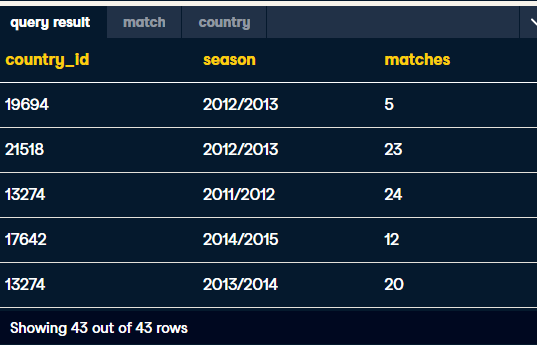

4. Finally, declare the same query from step 2 as a subquery in FROM with the alias outer_s.
5. Left join it to the country table using the outer query's country_id column.
6. Calculate an AVG of high scoring matches per country in the main query.

In [ ]:
SELECT
	c.name AS country,
    -- Calculate the average matches per season
    AVG(outer_s.matches) AS avg_seasonal_high_scores
FROM country AS c
-- Left join outer_s to country
LEFT JOIN (
  SELECT country_id, season,
         COUNT(id) AS matches
  FROM (
    SELECT country_id, season, id
	FROM match
	WHERE home_goal >= 5 OR away_goal >= 5) AS inner_s
  -- Close parentheses and alias the subquery
  GROUP BY country_id, season) AS outer_s
ON c.id = outer_s.country_id
GROUP BY country;

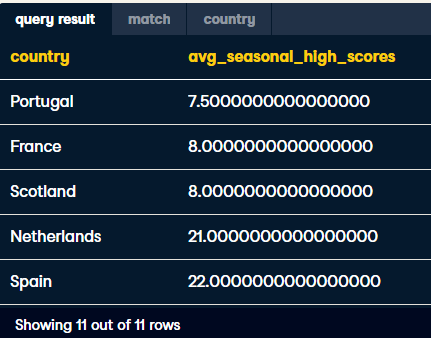

## Common Table Expressions
Great job getting the hang of nested and correlated subqueries.

2. When adding subqueries...
As you probably noticed, the queries we have been setting up are quickly becoming long and complex. It can become difficult to clearly keep track of each piece of your query, why you need it, and whether or not it's necessary. In this lesson, we'll cover a common method for improving readability and accessibility of information in subqueries -- the common table expression.

3. Common Table Expressions
Common table expressions, or CTEs are a special type of subquery that is declared ahead of your main query, just like you see here. Instead of wrapping subqueries inside, say the FROM statement, you name it using the WITH statement, and then reference it by name later in the FROM statement as if it were any other table in your database.

4. Take a subquery in FROM
Let's rewrite a query from an exercise that you completed in chapter 2, by using a CTE. The query you see here uses a subquery, s, in the FROM statement to generate a list of country id's and match IDs that meet a certain criteria -- specifically, we only wanted matches with 10 or more goals scored in total. This subquery is then joined to the country table, and the number of matches in the subquery is counted in the main query. Here are the results of that query -- a short list of countries with very few high-scoring matches.

5. Place it at the beginning
In order to rewrite this query using a common table expression to represent the subquery, simply take the subquery out of the FROM clause, place it at the beginning of your query,

6. Place it at the beginning
declare it using the syntax WITH, followed by a CTE name, and AS. So, here we're starting our CTE, s, by stating WITH s AS, and then placing the subquery inside parentheses. It's now a common table expression!

7. Show me the CTE
Finally, complete the rest of the query the same way you would if the CTE were an existing table in the database. You select the country name from the country table, count the number of matches in the CTE "s", JOIN "s" to the country table, and then group the results by the country name's alias. The results -- you guessed it -- are identical to the previous query setup!

8. Show me all the CTEs
If you have multiple subqueries that you want to turn into a common table expression, you can simply list them one after another, with a comma in between each CTE, and NO comma after the last one. You can then retrieve the information you need into the main query -- just make sure you properly join this second CTE as well!

9. Why use CTEs?
So why are we learning yet another method of producing the same result in a SQL query? Common table expressions have numerous benefits over a subquery written inside your main query. First, the CTE is run only once, and then stored in memory, so it often leads to an improvement in the amount of time it takes to run your query. Second, CTEs are an excellent tool for organizing long and complex CTEs. You can declare as many CTEs as you need, one after another. You can also reference information in CTEs declared earlier. For example, if you have 3 CTEs in a query, your third CTE can retrieve information from the first and second CTE. Finally, a CTE can reference itself in a special kind of table called a recursive CTE. We'll briefly discuss some more advanced applications of CTEs in the next lesson.

10. Let's practice!
For now, let's practice writing CTEs by modifying queries in exercises you completed in chapter 2.

In [ ]:
SELECT MID(Address, 0, LOCATE)